In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
import sys

# Salve o caminho original
original_path = sys.path.copy()

# Adicione o novo caminho


sys.path.insert(0, '../config/')

# Importe o módulo
import plot_functions

# Restaure o caminho original
sys.path = original_path


# Identificação dos tipos de colunas

In [3]:
open_path = os.path.join('..', 'dataset', 'clientes_mapeados.parquet')

df = pd.read_parquet(open_path)

In [4]:
# O começo do dataframe
df.head()

Cliente anonimizado   Tipo de venda Região  \
0            Cliente 1  Uso e consumo     MG   
1            Cliente 2  Uso e consumo     MG   
2            Cliente 3           None     MG   
3            Cliente 4  Uso e consumo     PR   
4            Cliente 5  Uso e consumo     PE   

                     Atividade Principal         Porte  Capital Social  \
0        Associação de Proteção Veicular        Demais            0.00   
1                                   None        Demais            0.00   
2                                   None        Demais            0.00   
3  Rastreamento e monitoramento veicular        Demais     51631311.76   
4  Rastreamento e monitoramento veicular  Microempresa       150000.00   

    Código e Descrição Natureza Juridica  \
0             399-9 - Associação Privada   
1             399-9 - Associação Privada   
2             399-9 - Associação Privada   
3      205-4 - Sociedade Anônima Fechada   
4  206-2 - Sociedade Empresária Limitada   

                          CNAE Principal CNAE Secundário  Unnamed: 9  ...  \
0         Outras atividades associativas            None        None  ...   
1         Outras atividades associativas            None        None  ...   
2         Outras atividades associativas            None        None  ...   
3  Monitoramento de segurança eletrônico      47.89-0-99  64.63-8-00  ...   
4  Monitoramento de segurança eletrônico      80.20-0-01  43.21-5-00  ...   

  Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45  \
0        None        None        None        None        None        None   
1        None        None        None        None        None        None   
2        None        None        None        None        None        None   
3        None        None        None        None        None        None   
4        None        None        None        None        None        None   

  Unnamed: 46 Unnamed: 47 Unnamed: 48 Unnamed: 49  
0        None        None        None        None  
1        None        None        None        None  
2        None        None        None        None  
3        None        None        None        None  
4        None        None        None        None  

[5 rows x 50 columns]

In [5]:
# Tipos das variáveis e quantidade de pontos não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cliente anonimizado                   37 non-null     object 
 1   Tipo de venda                         34 non-null     object 
 2   Região                                37 non-null     object 
 3   Atividade Principal                   33 non-null     object 
 4   Porte                                 37 non-null     object 
 5   Capital Social                        37 non-null     float64
 6   Código e Descrição Natureza Juridica  37 non-null     object 
 7   CNAE Principal                        37 non-null     object 
 8   CNAE Secundário                       33 non-null     object 
 9   Unnamed: 9                            28 non-null     object 
 10  Unnamed: 10                           23 non-null     object 
 11  Unnamed: 11          

Colunas string que podem ser chave-primária ou descrição.

In [6]:
# Identificar colunas do tipo object
object_columns = df.columns

# Calcular o número de categorias únicas em cada coluna
unique_counts = {col: df[col].nunique() for col in object_columns}

# Exibir os resultados em uma tabela
result_df = pd.DataFrame(list(unique_counts.items()), columns=['Coluna', 'Número de Itens Únicos'])
print(result_df)

                                  Coluna  Número de Itens Únicos
0                   Cliente anonimizado                       36
1                          Tipo de venda                       2
2                                 Região                      11
3                    Atividade Principal                       7
4                                  Porte                       3
5                         Capital Social                      23
6   Código e Descrição Natureza Juridica                       5
7                         CNAE Principal                      21
8                        CNAE Secundário                      20
9                             Unnamed: 9                      23
10                           Unnamed: 10                      19
11                           Unnamed: 11                      19
12                           Unnamed: 12                      15
13                           Unnamed: 13                      13
14                       

	cat  
Tipo de venda  
Região  
Atividade Principal  
Porte  
Código e Descrição Natureza Juridica  
CNAE Principal  
  
    num  
Capital Social  
  
	não agregável  
Cliente anonimizado  

In [7]:
Non_Aggregatable = ['Cliente anonimizado']

In [8]:
Categorical = ['Tipo de venda',
               'Região',
               'Atividade Principal',
               'Porte',
               'Código e Descrição Natureza Juridica',
               'CNAE Principal']

In [9]:
Numerical = ['Capital Social']

In [10]:
df_a = df[Categorical+Numerical]

## Ajuste dos tipos de variáveis

Conversão para DateTime.

In [11]:
def convert_datetime_columns(df):
    newdf = df.copy()
    for col in newdf.select_dtypes(include=['object']).columns:
        try:
            newdf[col] = pd.to_datetime(newdf[col], errors='raise', dayfirst=True)
        except ValueError:
            try:
                newdf[col] = pd.to_datetime(newdf[col], errors='raise')
            except ValueError:
                pass
    
    return newdf

In [12]:
df_time = convert_datetime_columns(df_a)

In [13]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tipo de venda                         34 non-null     object 
 1   Região                                37 non-null     object 
 2   Atividade Principal                   33 non-null     object 
 3   Porte                                 37 non-null     object 
 4   Código e Descrição Natureza Juridica  37 non-null     object 
 5   CNAE Principal                        37 non-null     object 
 6   Capital Social                        37 non-null     float64
dtypes: float64(1), object(6)
memory usage: 2.1+ KB


Conversão de numéricos para categóricos:

In [14]:
df_t = df_time.copy()
for col in Categorical:
    df_t[col] = df_time[col].astype('object')

In [15]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tipo de venda                         34 non-null     object 
 1   Região                                37 non-null     object 
 2   Atividade Principal                   33 non-null     object 
 3   Porte                                 37 non-null     object 
 4   Código e Descrição Natureza Juridica  37 non-null     object 
 5   CNAE Principal                        37 non-null     object 
 6   Capital Social                        37 non-null     float64
dtypes: float64(1), object(6)
memory usage: 2.1+ KB


In [16]:
df_n = df_t[Numerical]
df_c = df_t[Categorical]

# Apresentação dos Dados

Variáveis numéricas

Tamanho do dataset:

In [17]:
n_l = df_t.shape[0]
n_c = df_t.shape[1]

print(f'''Itens relevantes:
{' '*(10-len(str(n_c)))}{n_c} variáveis.
{' '*(10-len(str(n_l)))}{n_l} instâncias.''')

Itens relevantes:
         7 variáveis.
        37 instâncias.


Tipos das variáveis:

In [18]:
print('       Tipos presentes no dataframe:')
for i in set(df_t.dtypes):
    print(f'{i}:')
    for col in df_t.columns:
        if i == df_t[col].dtypes:
            print(f'  {col}')

       Tipos presentes no dataframe:
float64:
  Capital Social
object:
  Tipo de venda
  Região
  Atividade Principal
  Porte
  Código e Descrição Natureza Juridica
  CNAE Principal


Contagem de valores ausentes;

In [19]:
nan_counts = df.isna().sum()
print("Contagem de NaN por coluna:")
print(nan_counts)

Contagem de NaN por coluna:
Cliente anonimizado                      0
Tipo de venda                            3
Região                                   0
Atividade Principal                      4
Porte                                    0
Capital Social                           0
Código e Descrição Natureza Juridica     0
CNAE Principal                           0
CNAE Secundário                          4
Unnamed: 9                               9
Unnamed: 10                             14
Unnamed: 11                             16
Unnamed: 12                             20
Unnamed: 13                             23
Unnamed: 14                             26
Unnamed: 15                             28
Unnamed: 16                             29
Unnamed: 17                             31
Unnamed: 18                             32
Unnamed: 19                             32
Unnamed: 20                             32
Unnamed: 21                             34
Unnamed: 22               

In [20]:
missing = df.isna().any(axis=1).sum()
print(f'{missing} instâncias têm algum valor ausent.')
print(f'{missing*100/len(df)}% do dataset está incompleto.')

36 instâncias têm algum valor ausent.
97.29729729729729% do dataset está incompleto.


Medidas das variáveis numéricas.

In [21]:
resumo = df_n.describe().T
resumo = resumo.drop(columns=['count'])
resumo = resumo.rename(columns={
    'mean': 'Média',
    'std': 'Desvio-padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': 'Mediana',
    '75%': '3º Quartil',
    'max': 'Máximo'
})

resumo['Amplitude'] = resumo['Máximo'] - resumo['Mínimo']
resumo['Coeficiente de Variação'] = resumo['Desvio-padrão'] / resumo['Média']

moda = df_n.apply(lambda x: x.mode().values[0])

# Calcular a variância
variance = df_n.var()

# Incluir essas medidas no resumo
resumo['Moda'] = moda
resumo['Variância'] = variance


In [22]:
resumo

Média  Desvio-padrão  Mínimo  1º Quartil   Mediana  \
Capital Social  5.373974e+08   1.913821e+09     0.0     10000.0  100000.0   

                3º Quartil        Máximo     Amplitude  \
Capital Social   2173000.0  8.500000e+09  8.500000e+09   

                Coeficiente de Variação      Moda     Variância  
Capital Social                 3.561278  100000.0  3.662712e+18

Boxplots:

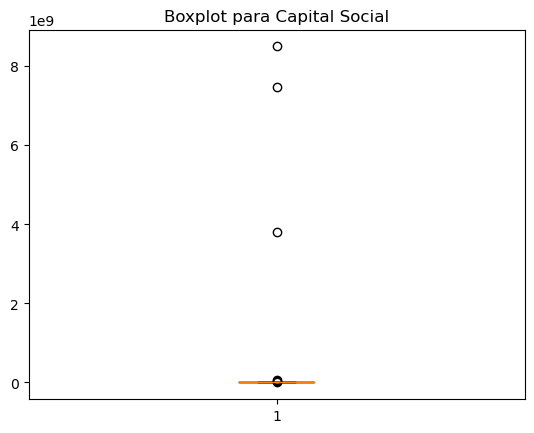

In [23]:
for col in df_n.columns:
    plt.boxplot(df_n[col])
    plt.title(f'Boxplot para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Percentis:

In [24]:
percent_array = np.arange(0,101)    # Isto cria um array com 101 números, de 0 a 100.

percentil_df = pd.DataFrame()
percentil_df['Percentil'] = percent_array    # Os percentuais correspondem a uma coluna do dataframe
percentil_df['Percentil'] = percentil_df['Percentil'].apply(lambda x: str(f'{x}%'))    # Isso deixa a coluna com formato percentual

for col in df_n:
    percentil_df[col] = np.percentile(df_n[col], percent_array)    # Para cada coluna numérica, uma coluna com apenas os percentis.

In [25]:
percentil_df

Percentil  Capital Social
0          0%    0.000000e+00
1          1%    0.000000e+00
2          2%    0.000000e+00
3          3%    0.000000e+00
4          4%    0.000000e+00
..        ...             ...
96        96%    5.858614e+09
97        97%    7.175387e+09
98        98%    7.756962e+09
99        99%    8.128481e+09
100      100%    8.500000e+09

[101 rows x 2 columns]

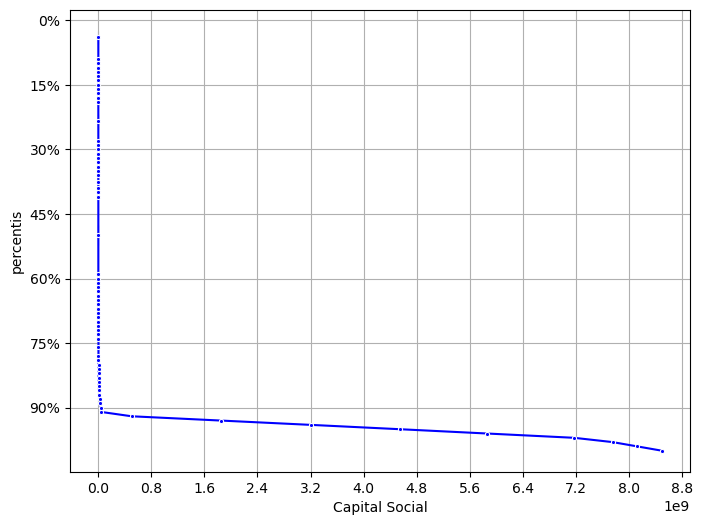

In [26]:
for col in percentil_df.columns:
    if col != 'Percentil':
        plot_functions.grafico_linhas(percentil_df[col],percentil_df['Percentil'],col,'percentis')

Histogramas:

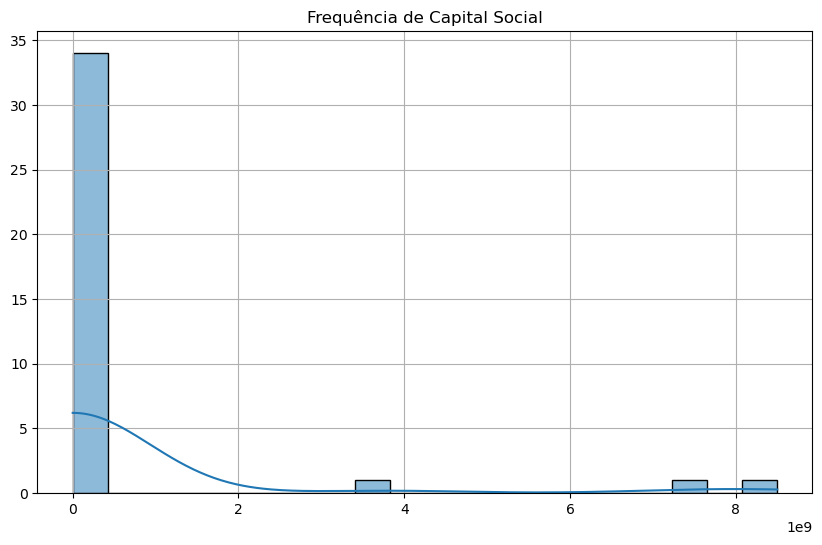

In [27]:
for col in df_n.columns:
    plot_functions.histograma(df_n,col,f'Frequência de {col}')

Scatterplot

In [28]:
incluso = []
for col1 in df_n.columns:
    incluso.append(col1)
    for col2 in df_n.columns:
        if col2 not in incluso:
            plot_functions.scatterplots(df_n, col1, col2)

Kernel Density Estimate - KDE

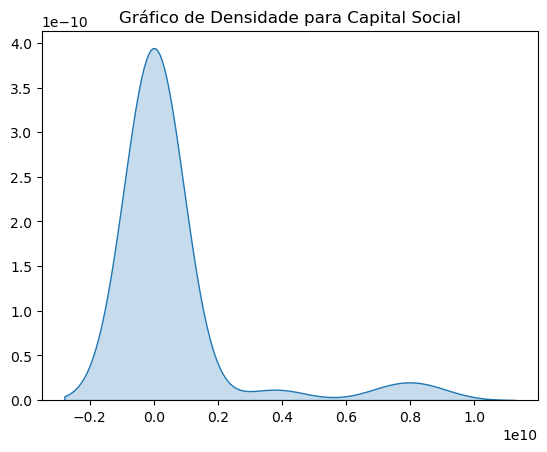

In [29]:
for col in df_n.columns:
    sns.kdeplot(df_n[col], fill=True)
    plt.title(f'Gráfico de Densidade para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Identificação de Outlier - pontos fora do intervalo interquartis.

In [30]:
# Calcular os limites para outliers em cada coluna numérica
outlier_indices = {}
for col in df_n.columns:
    Q1 = df_n[col].quantile(0.25)
    Q3 = df_n[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2000 * IQR
    upper_bound = Q3 + 2000 * IQR
    outliers = df_n[(df_n[col] < lower_bound) | (df_n[col] > upper_bound)].index.tolist()
    outlier_indices[col] = outliers

# Exibir os índices de outliers para cada coluna
for col, indices in outlier_indices.items():
    print(f"Índices de outliers na coluna '{col}'")
    for i in indices:
        print(' ',i)

Índices de outliers na coluna 'Capital Social'
  5
  8


Matriz de correlação:

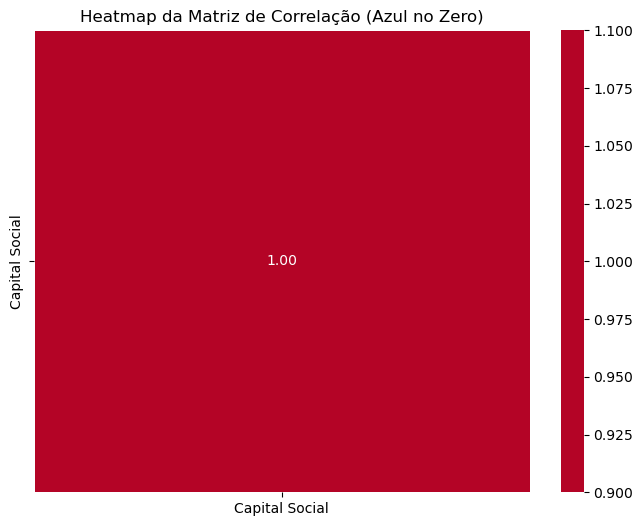

In [31]:
# "Quente" nas extremidades
plot_functions.correlação_heatmap(df_n)

## Variáveis categóricas

Gráficos de barras:

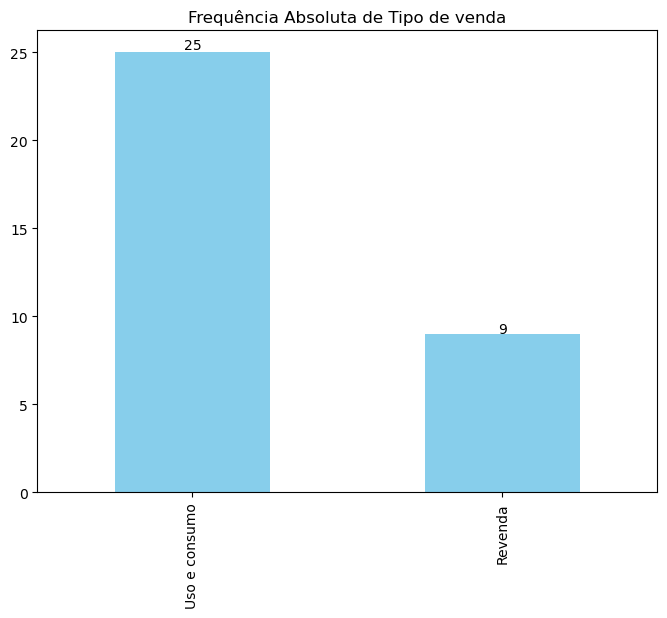

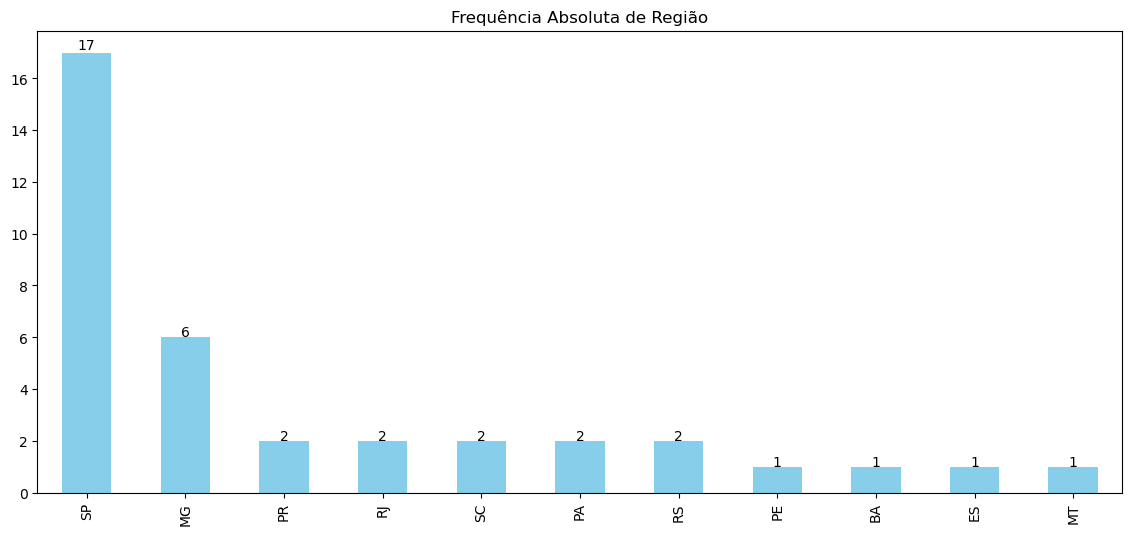

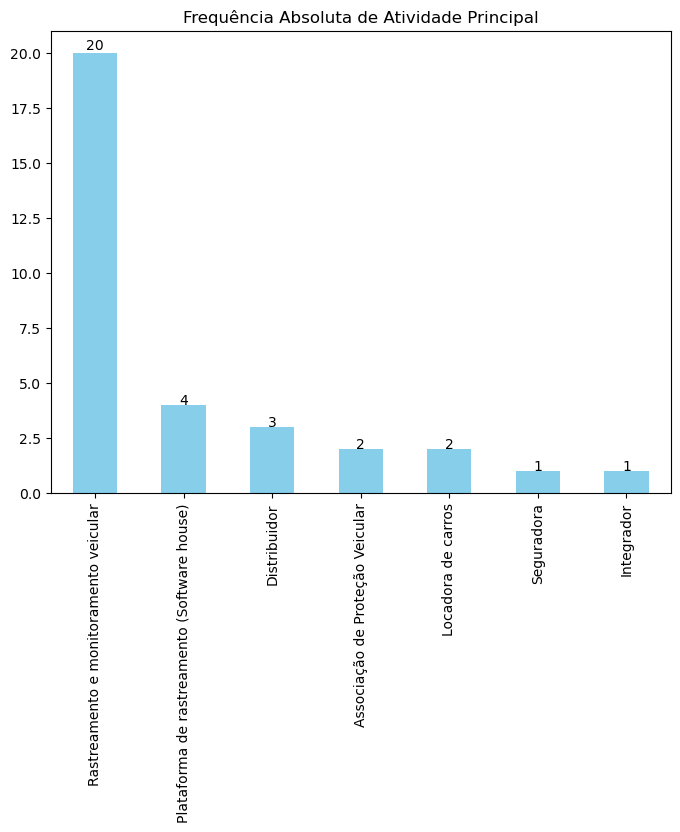

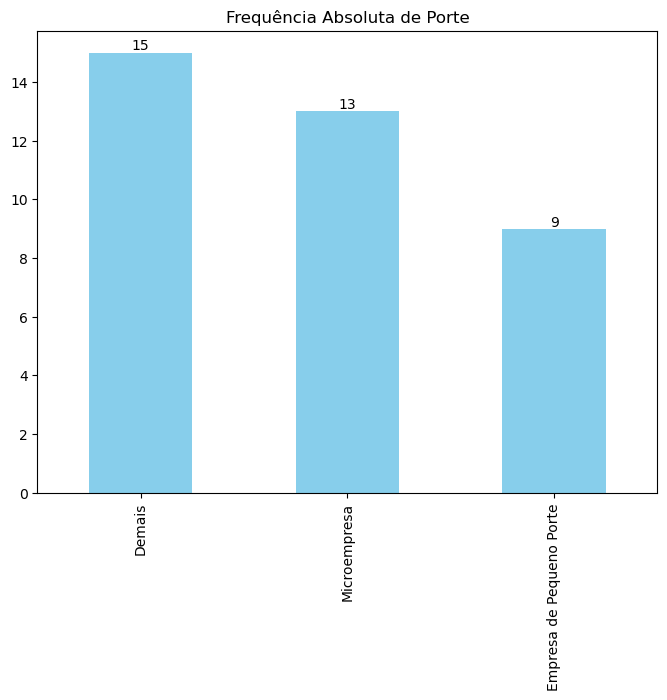

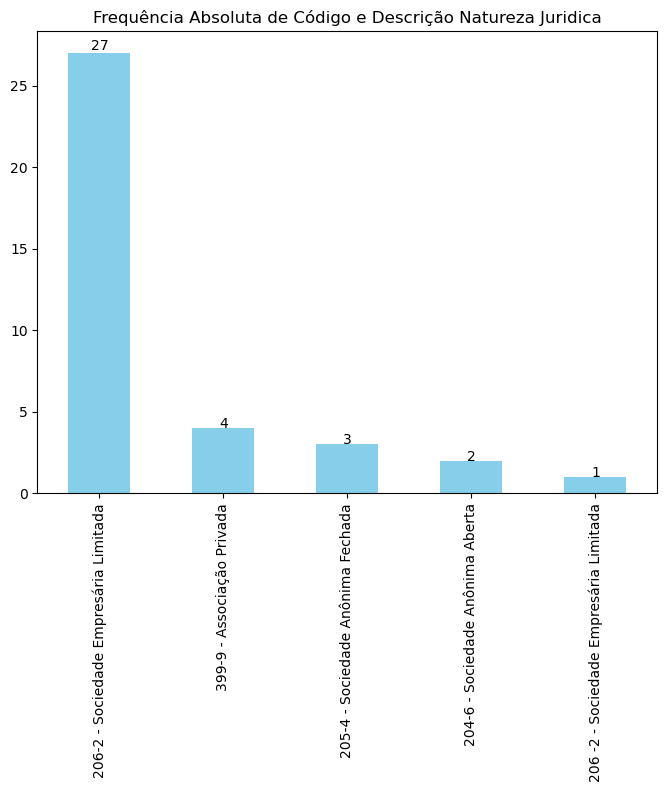

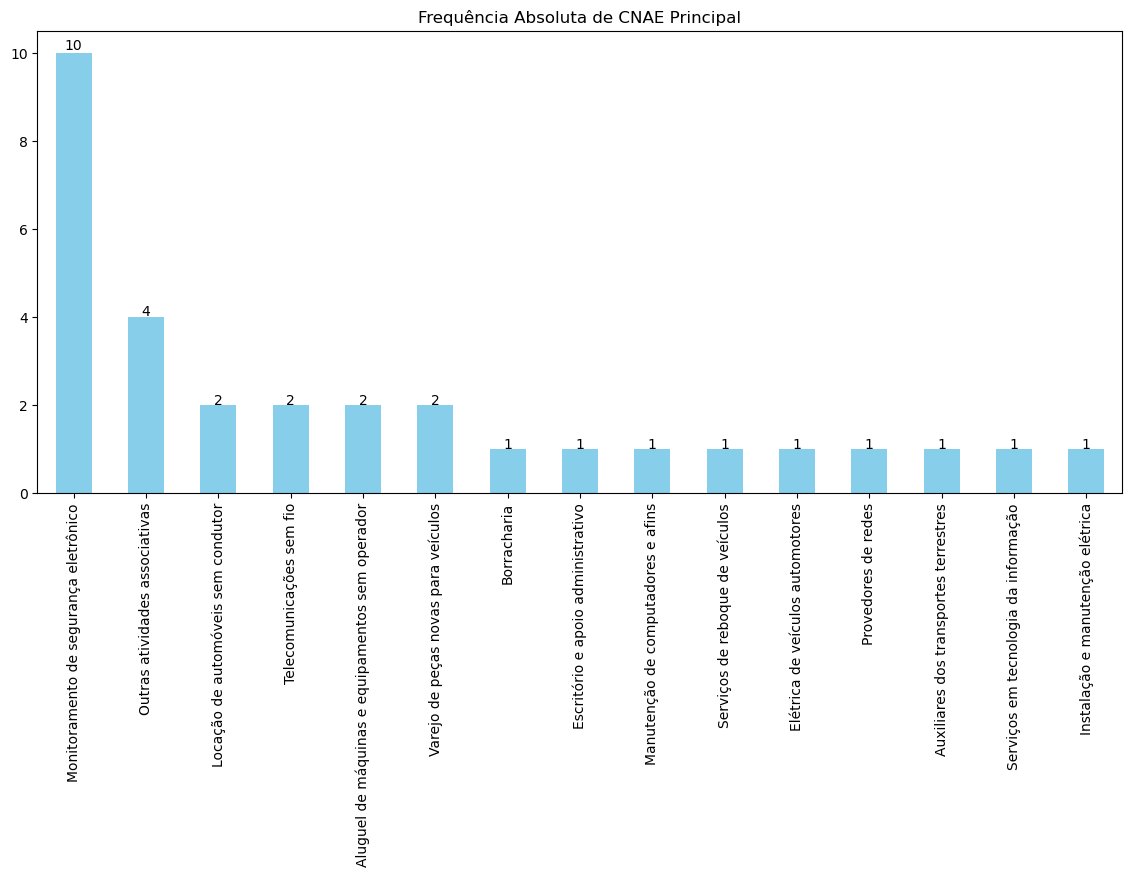

In [32]:
for col in df_c.columns:
    plot_functions.barras_absolutas(df_c[col])

Frequência relativa.

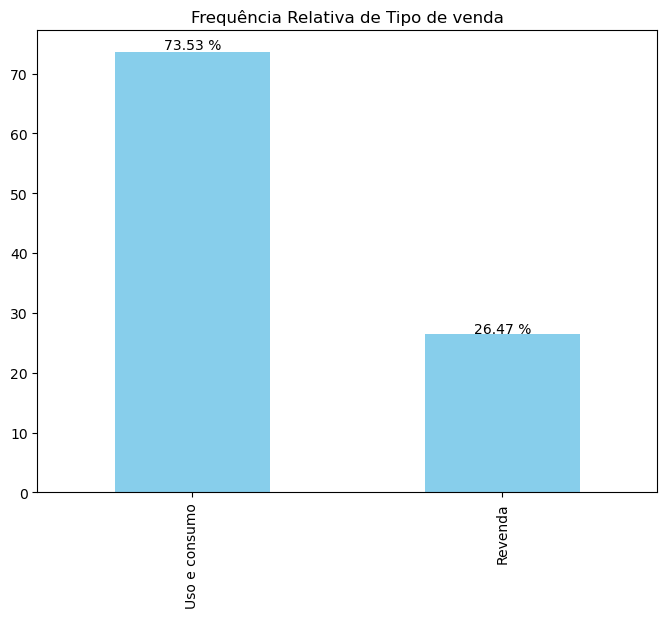

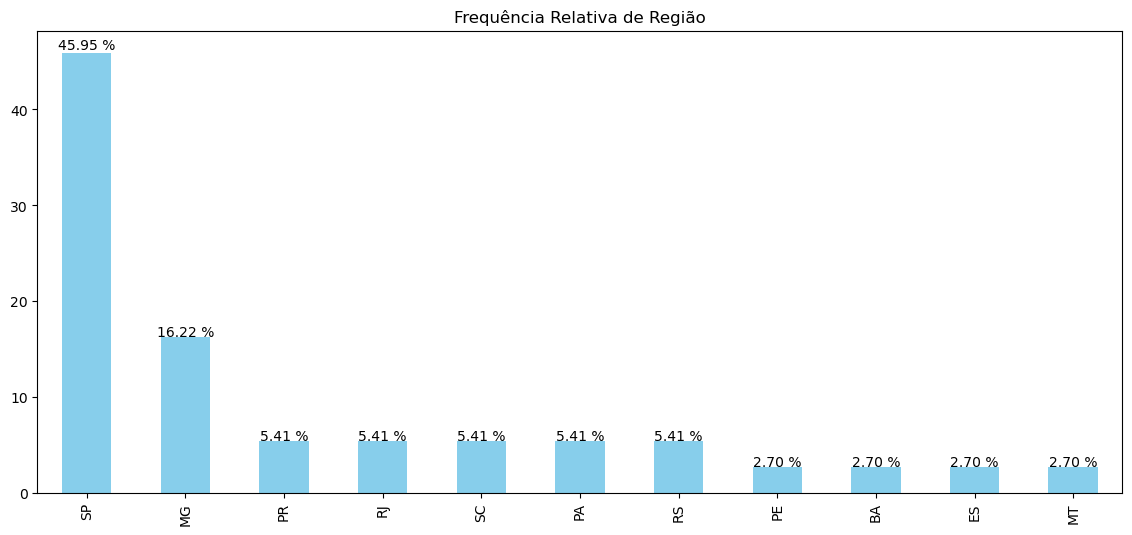

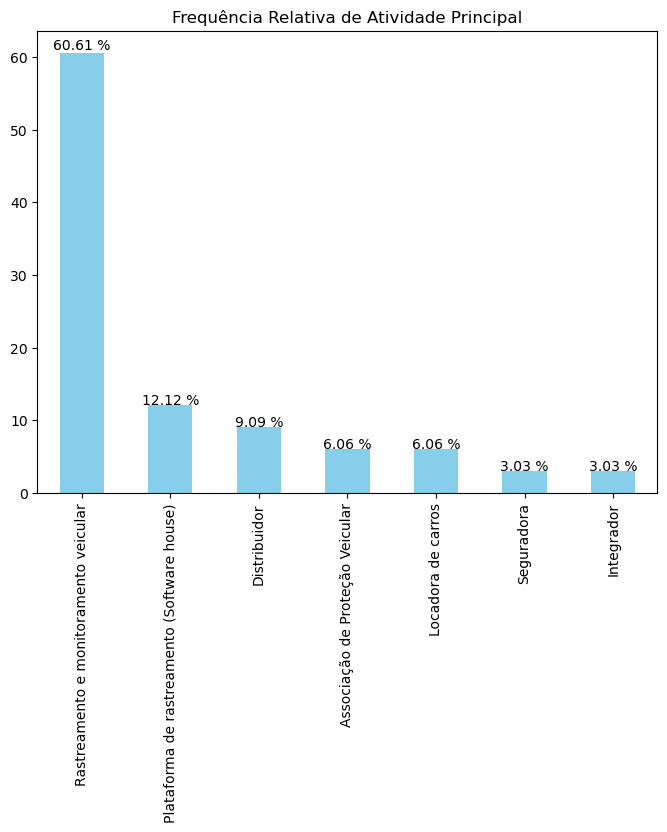

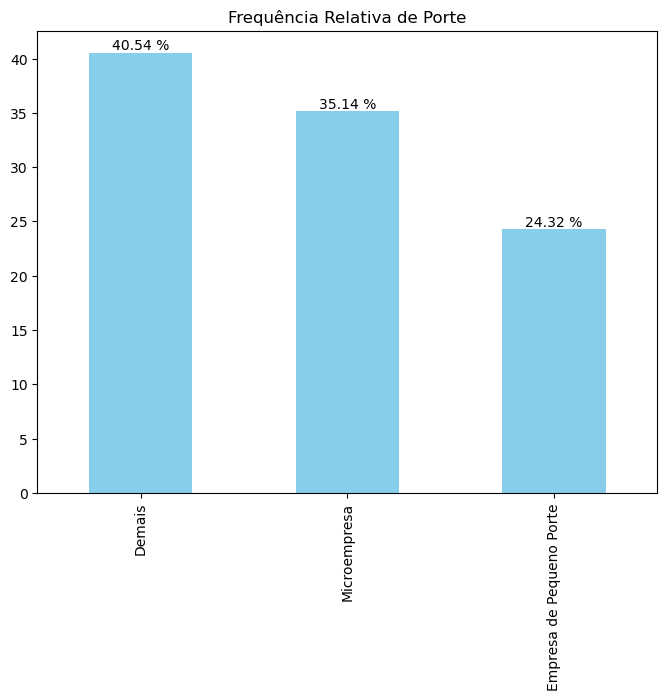

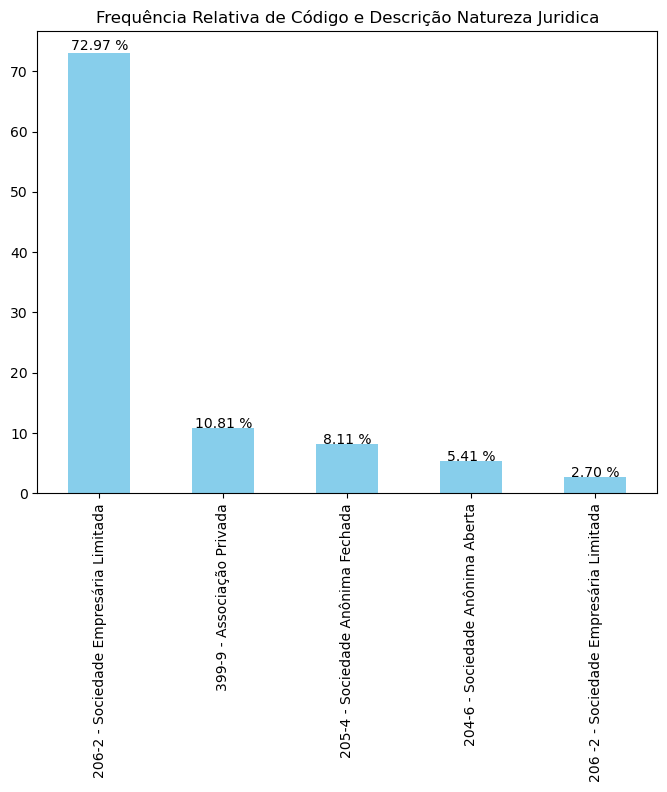

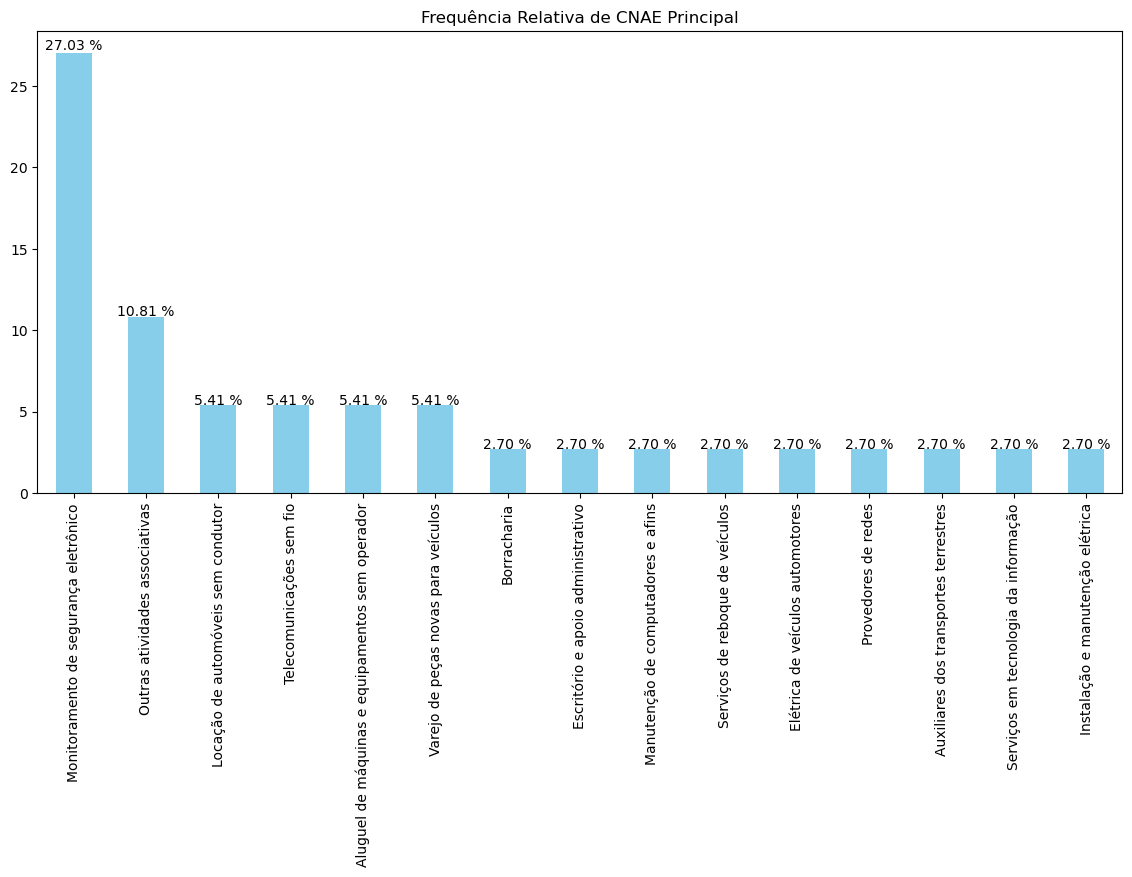

In [33]:
for col in df_c.columns:
    plot_functions.barras_percentuais(df_c[col])

Frequência por subcategorias.

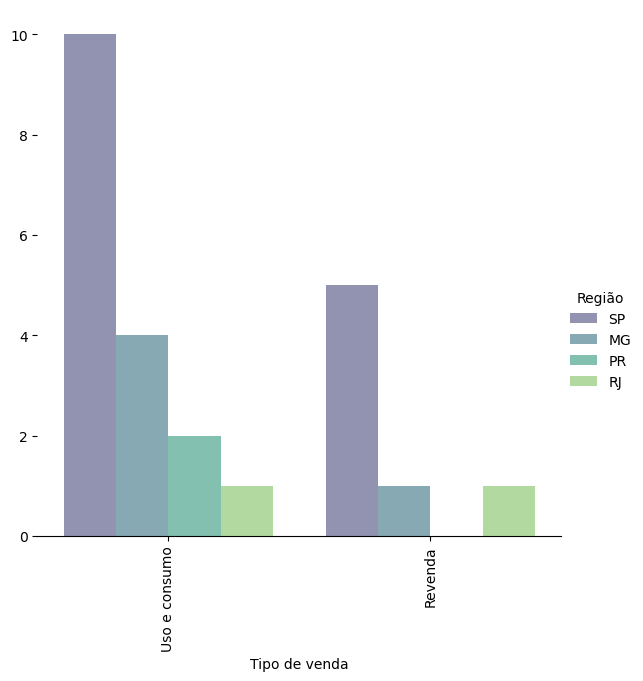

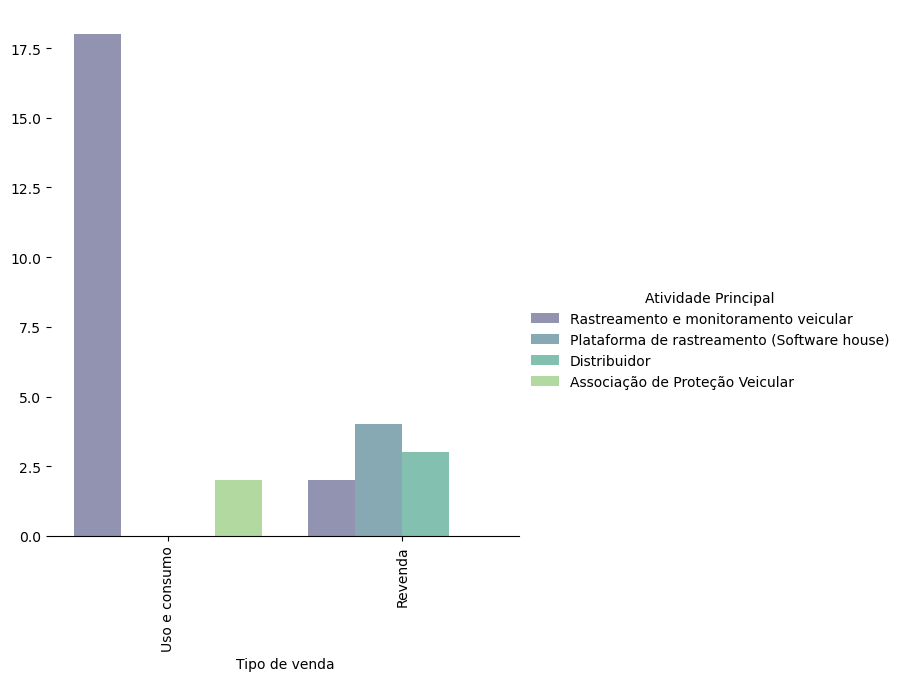

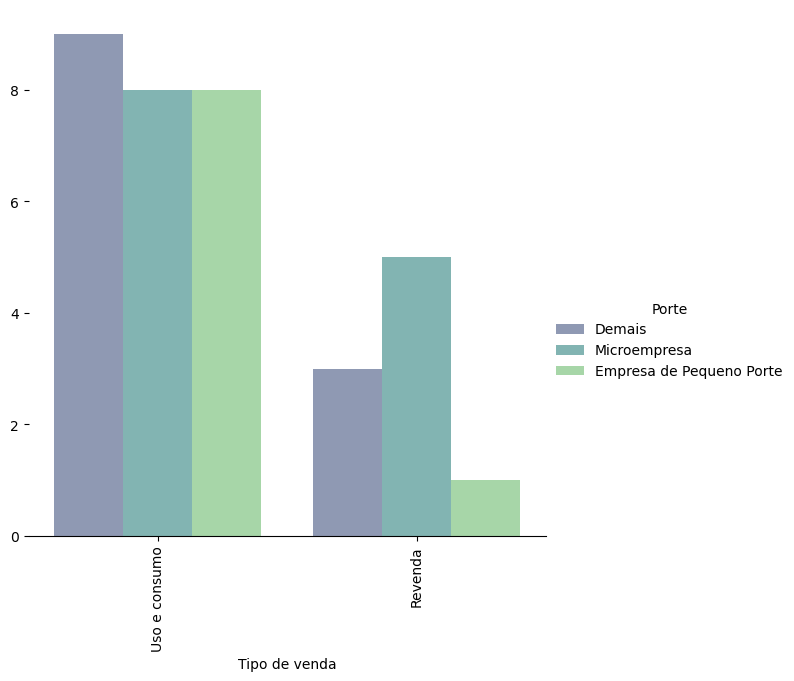

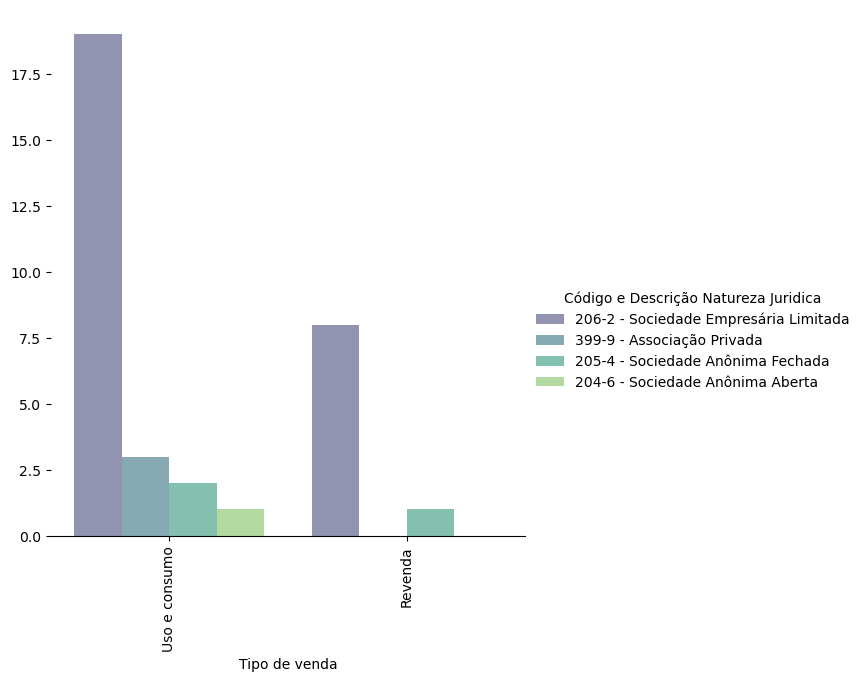

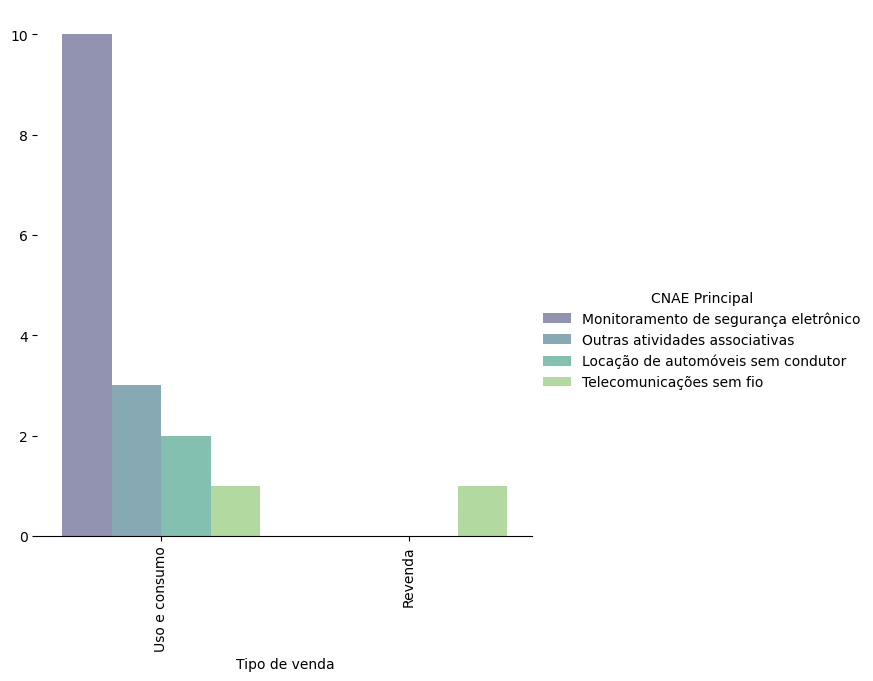

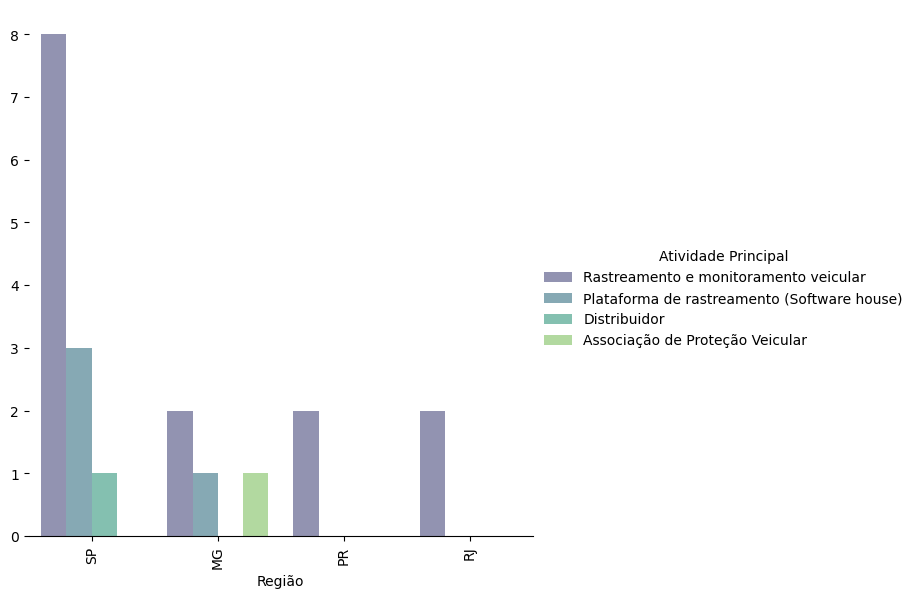

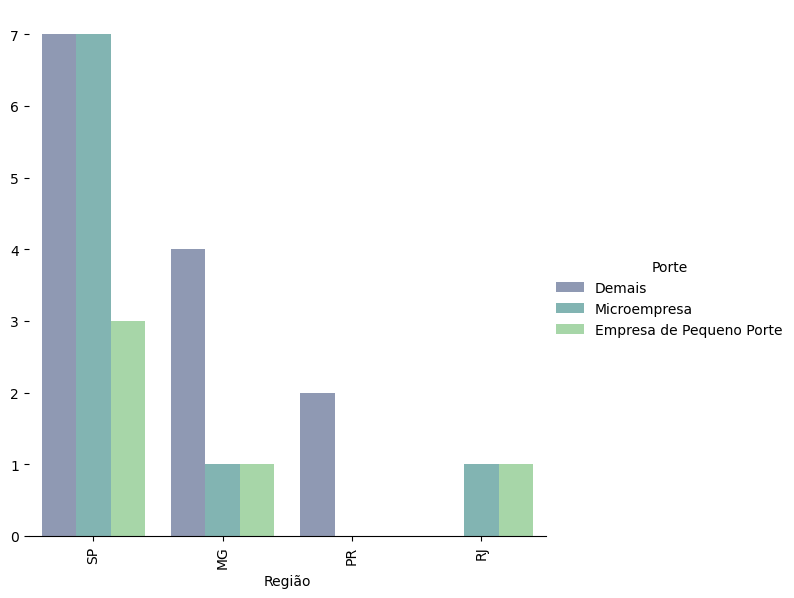

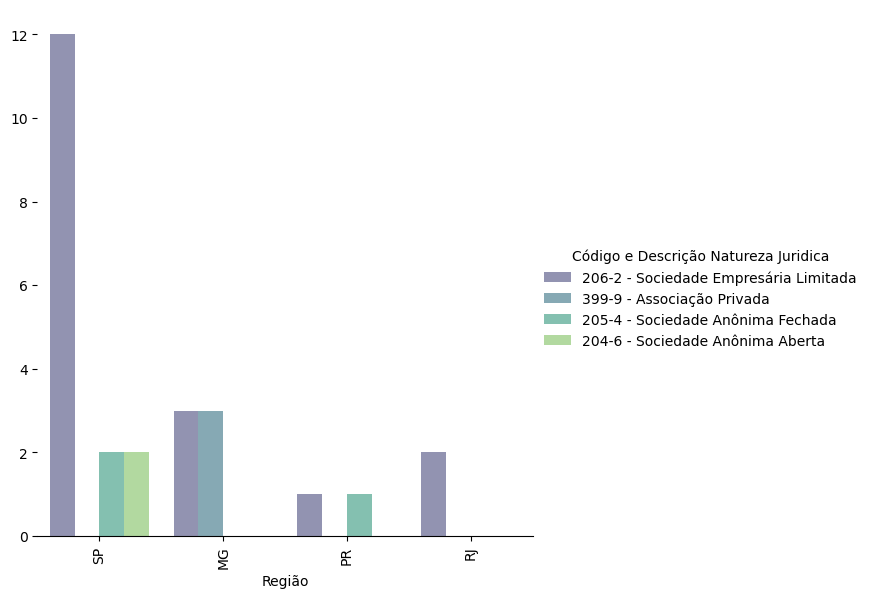

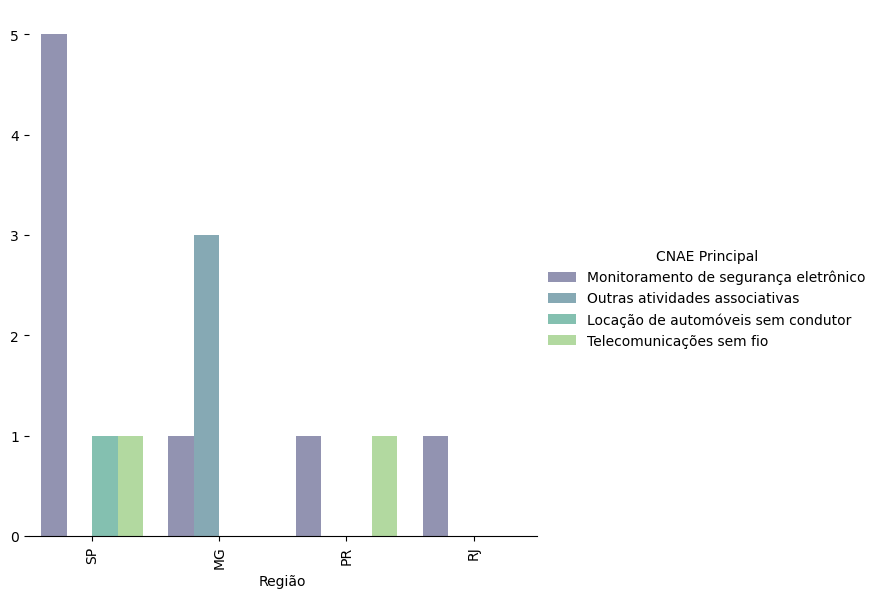

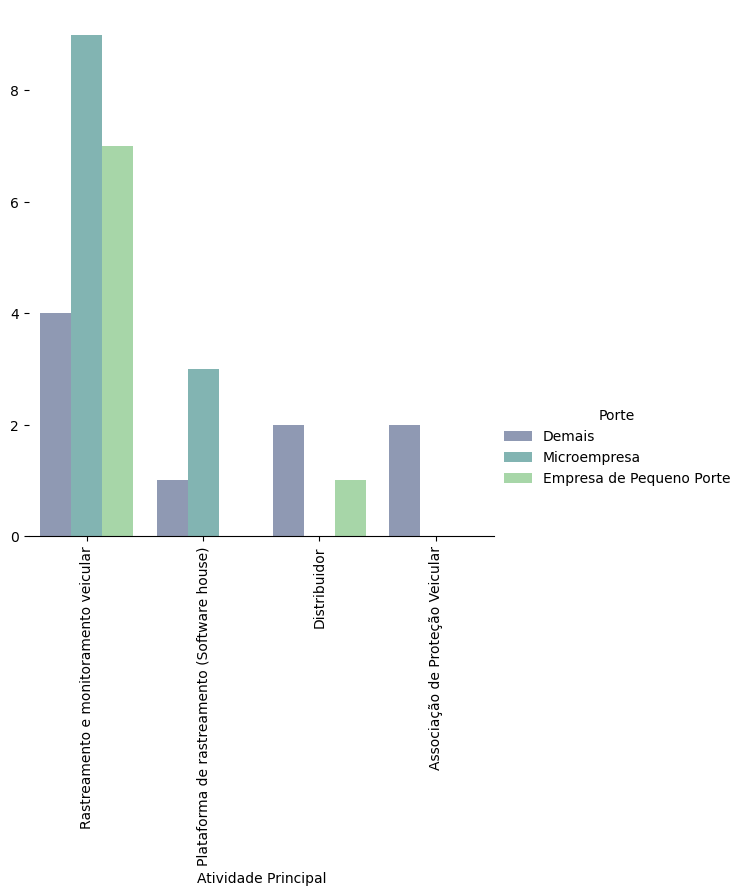

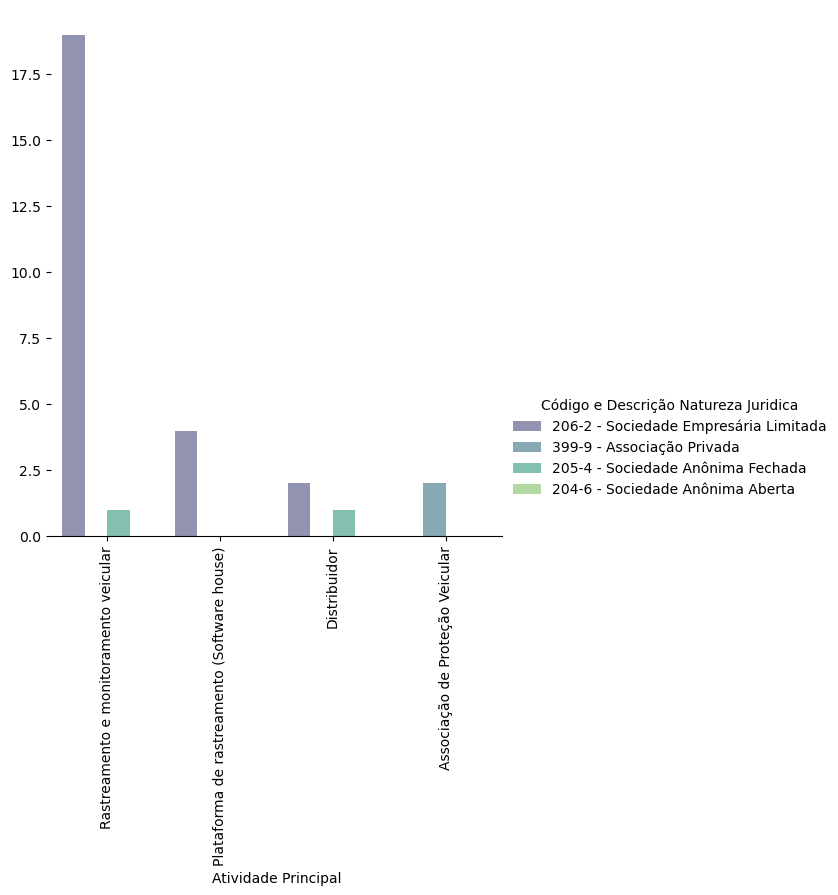

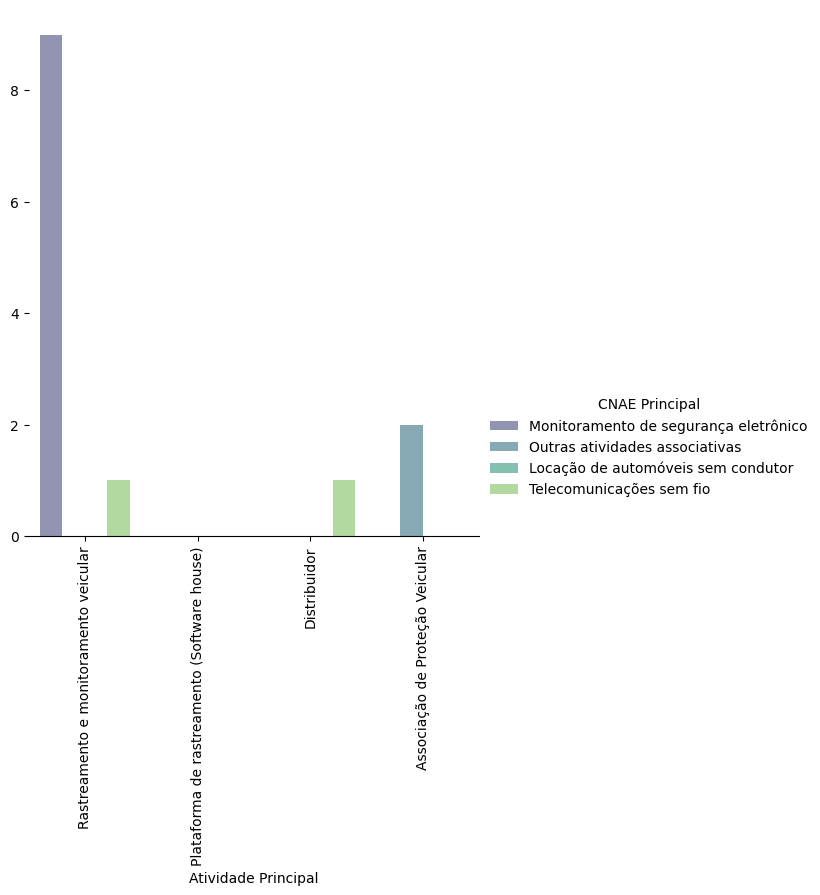

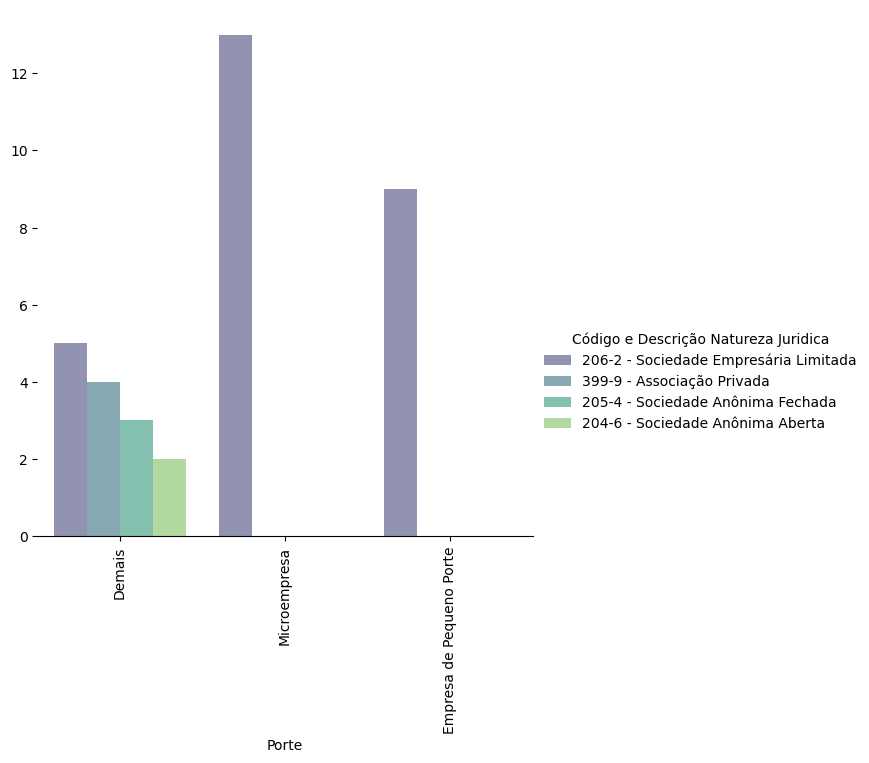

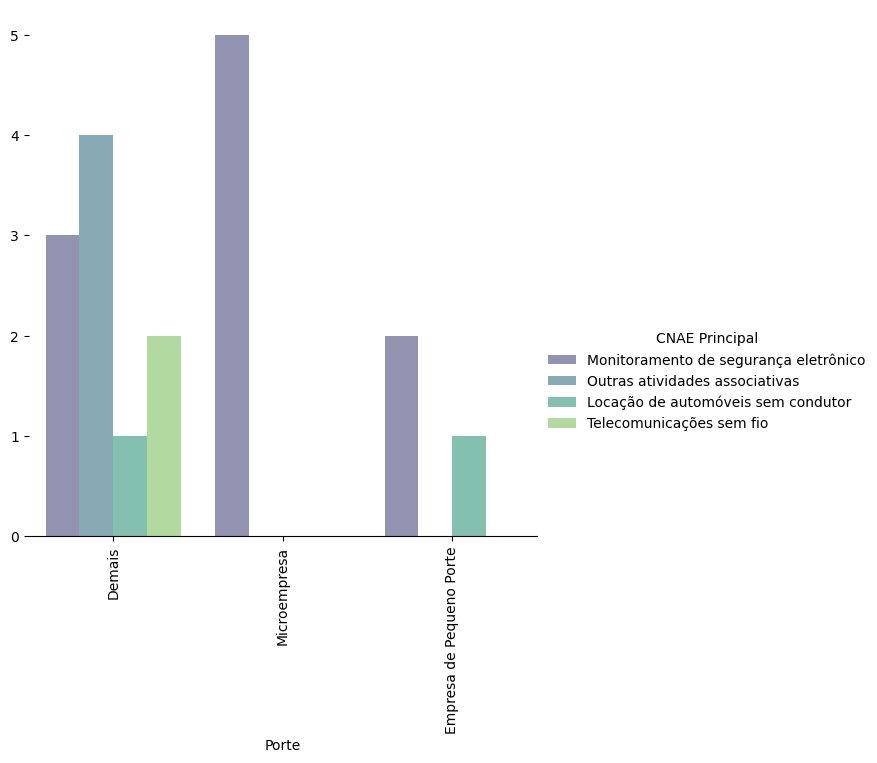

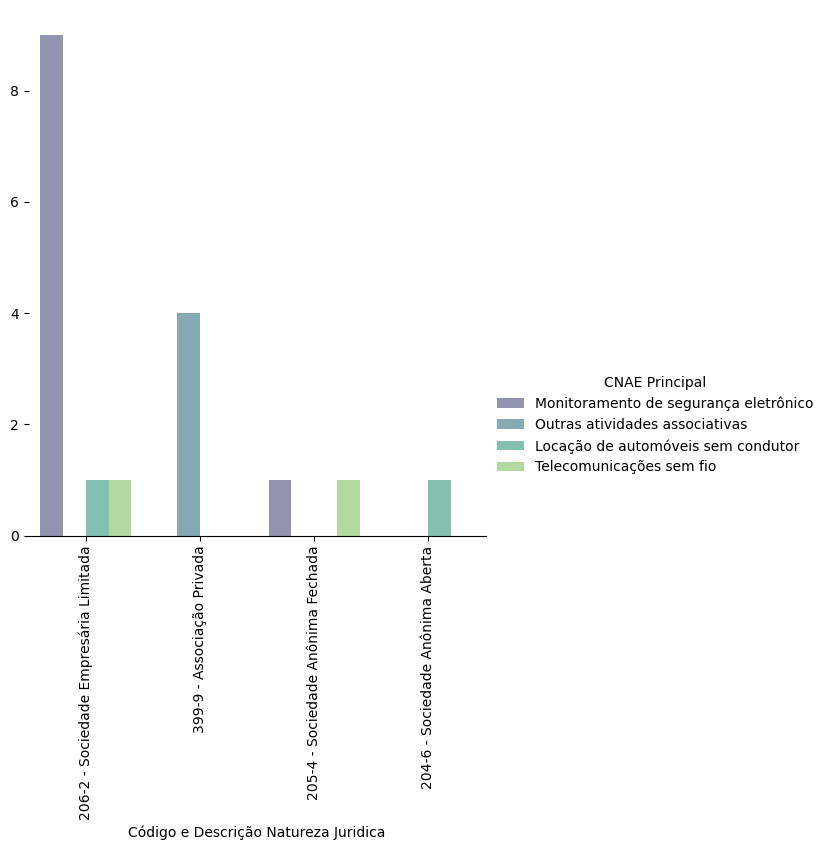

In [34]:
incluso = []
for grupo in df_c.columns:
    incluso.append(grupo)
    for categoria in df_c.columns:
        if categoria not in incluso and categoria not in ['municipio_f','bairro_h'] and grupo not in ['municipio_f','bairro_h']:
            plot_functions.barras_agregadas(df,grupo,categoria)

Contingência percentual

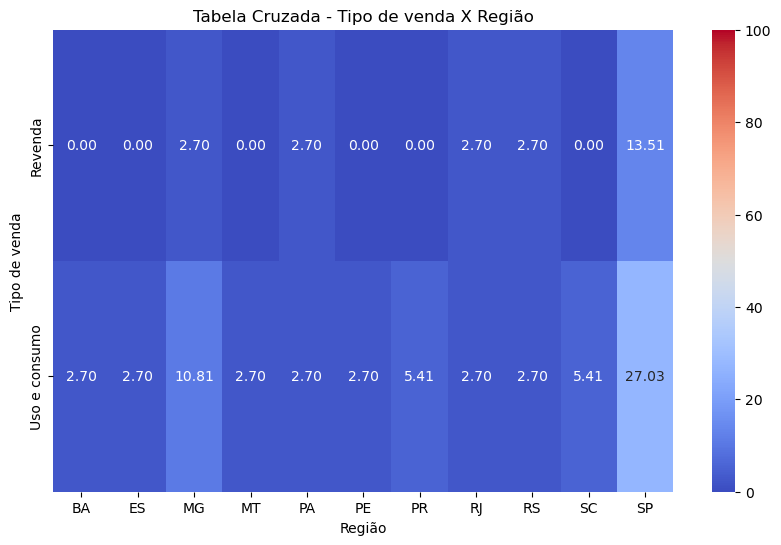

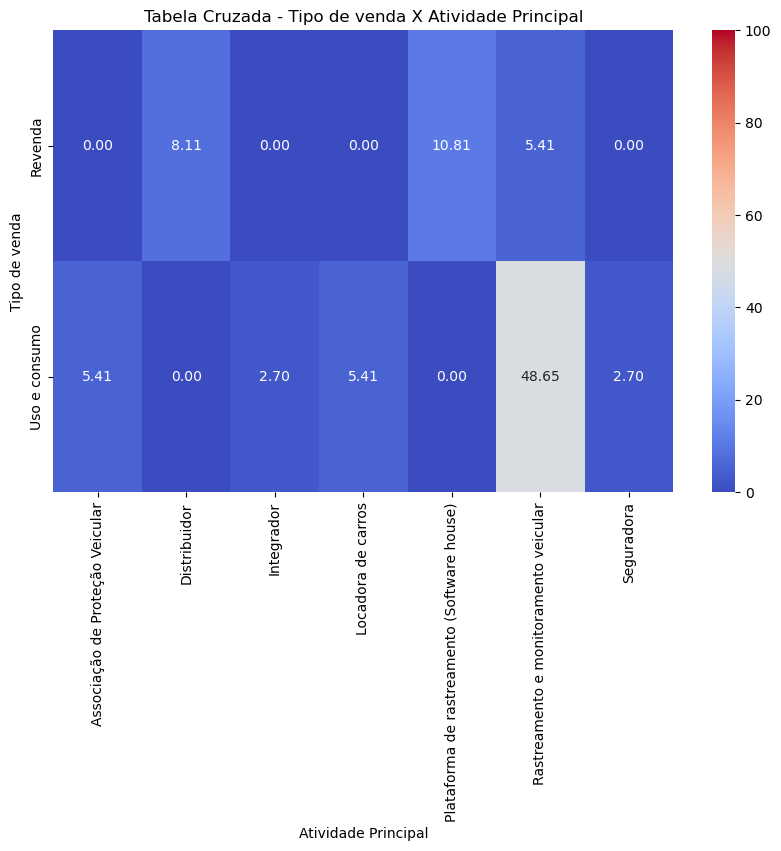

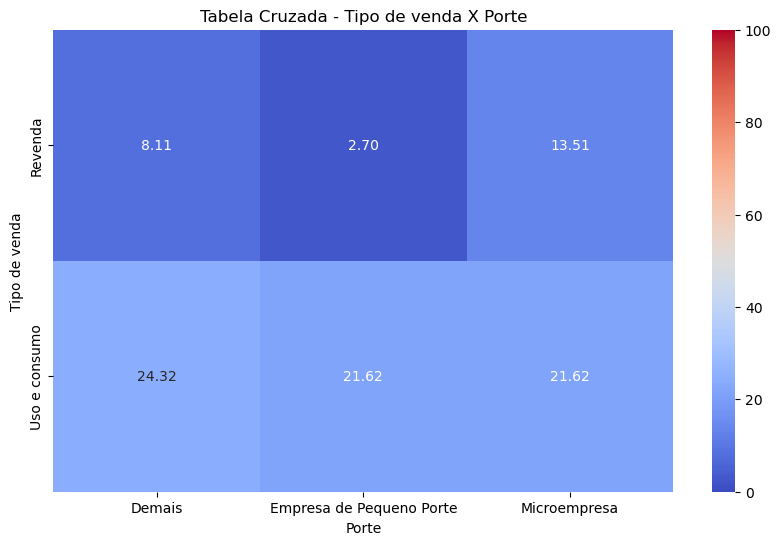

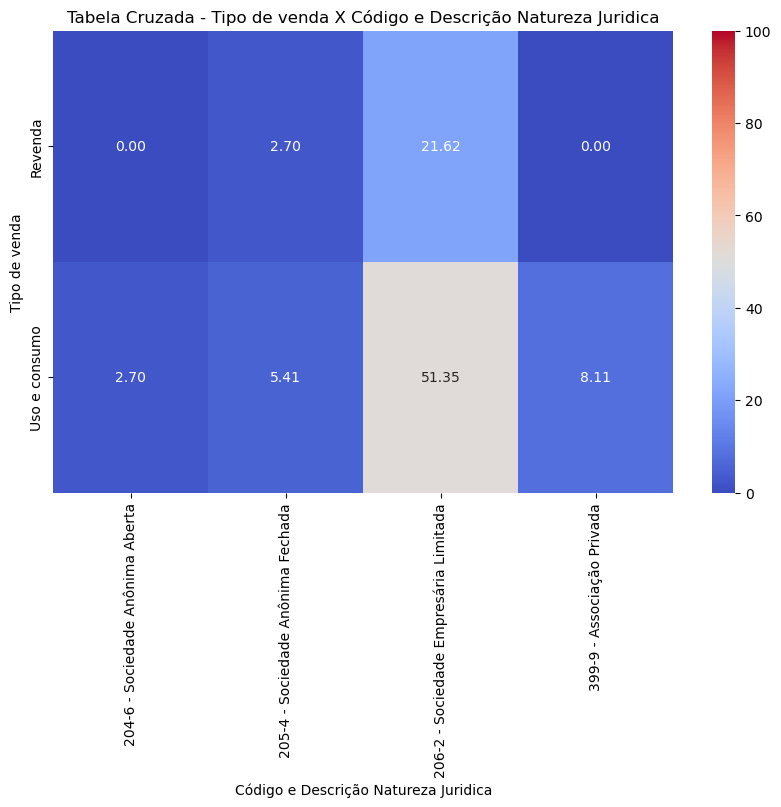

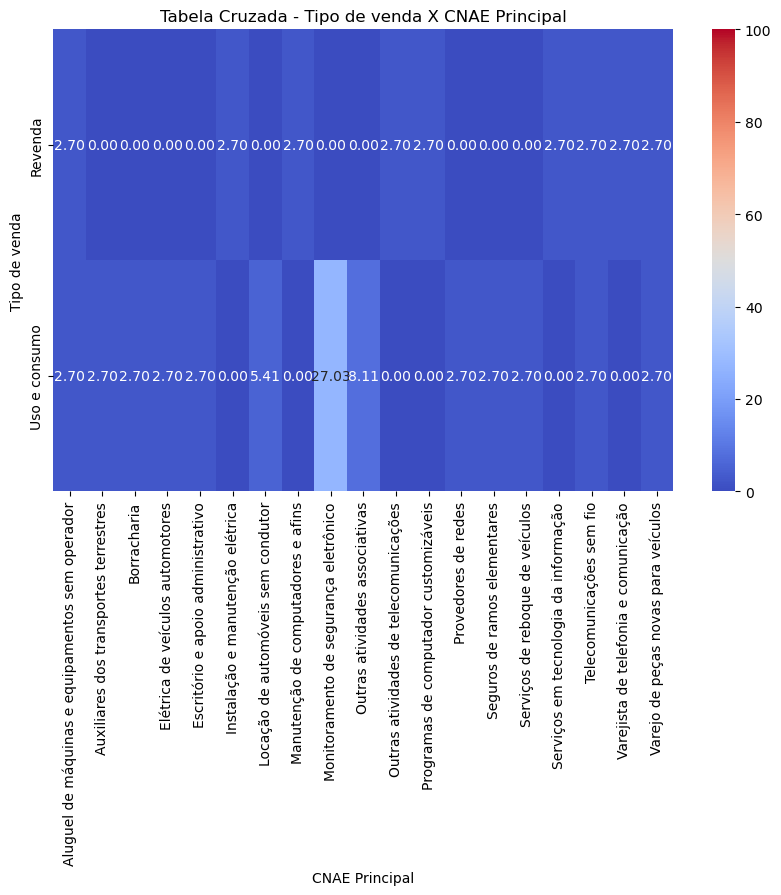

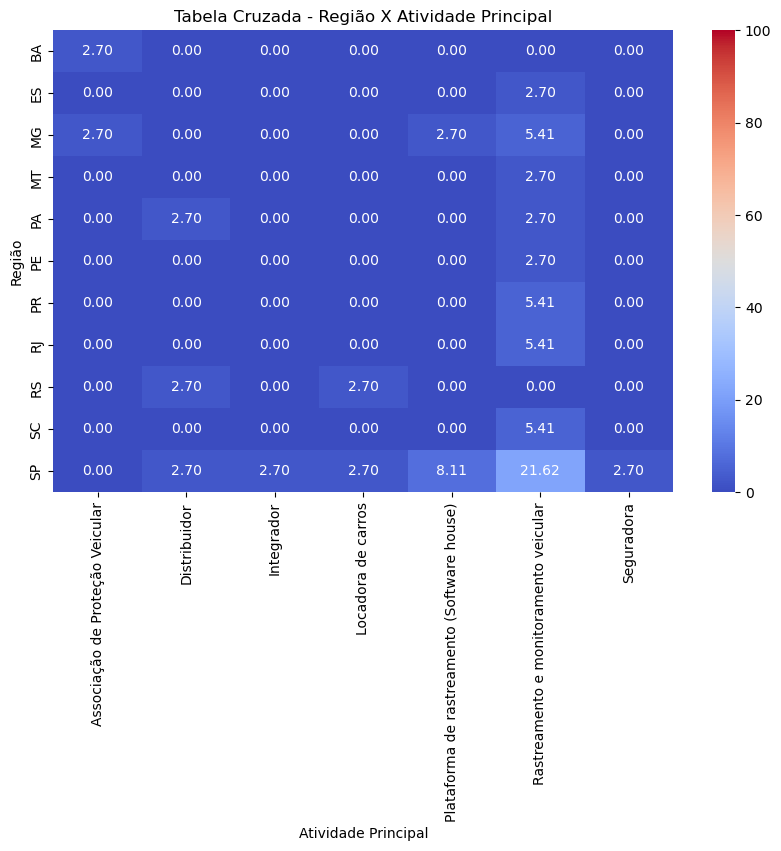

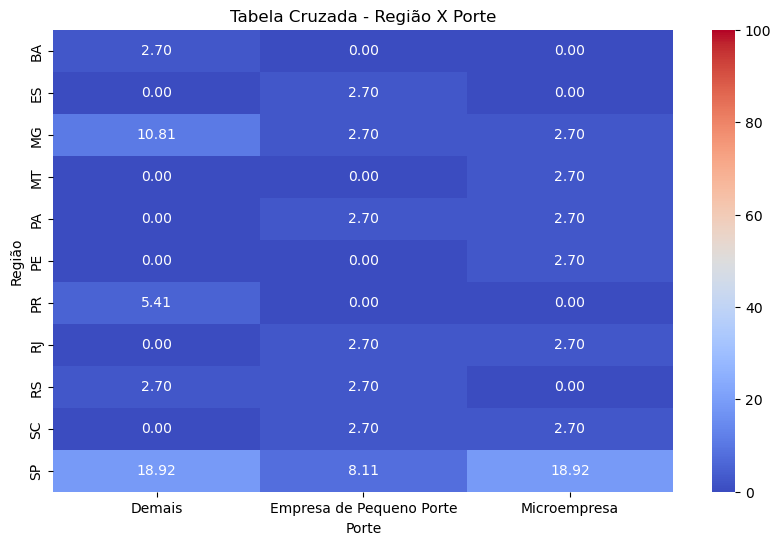

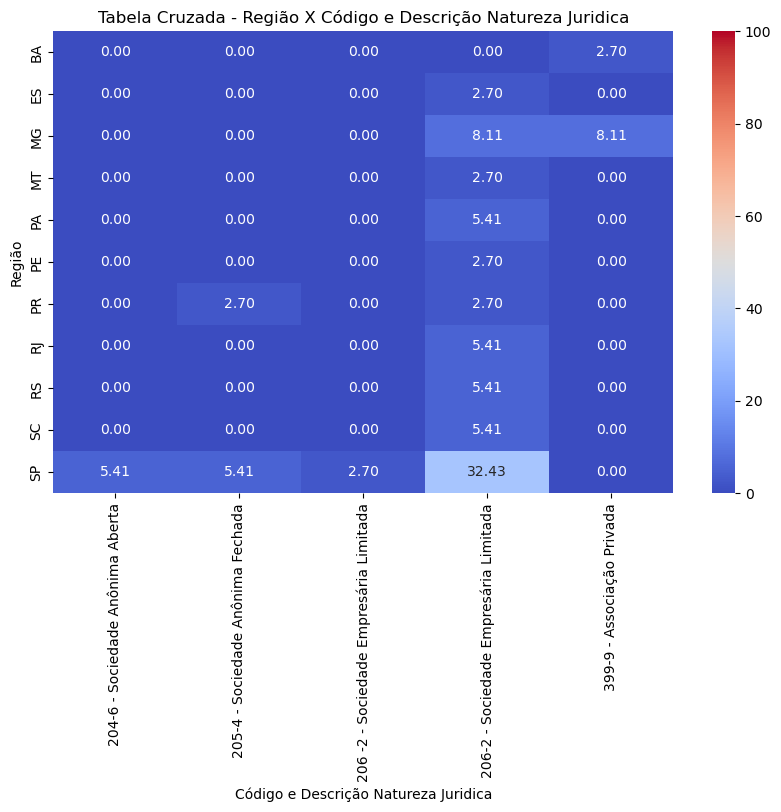

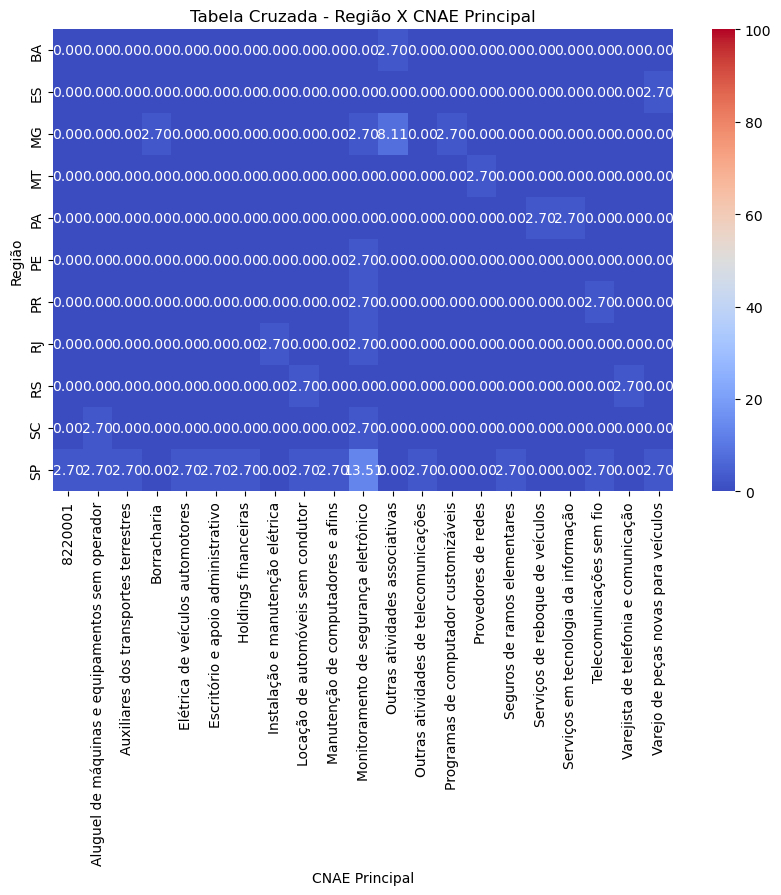

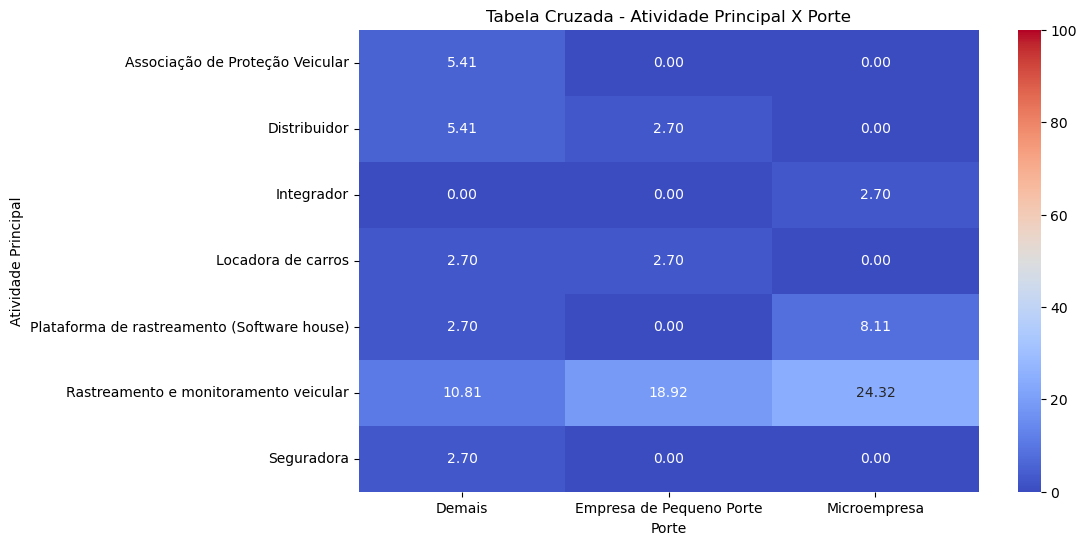

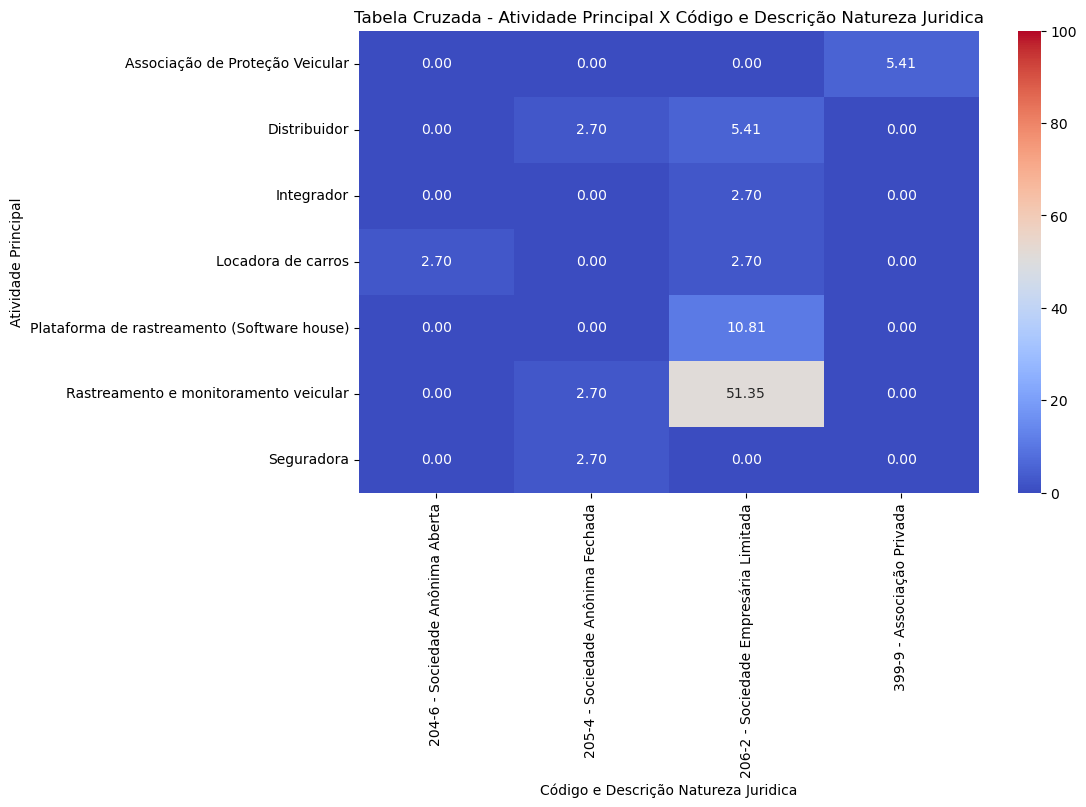

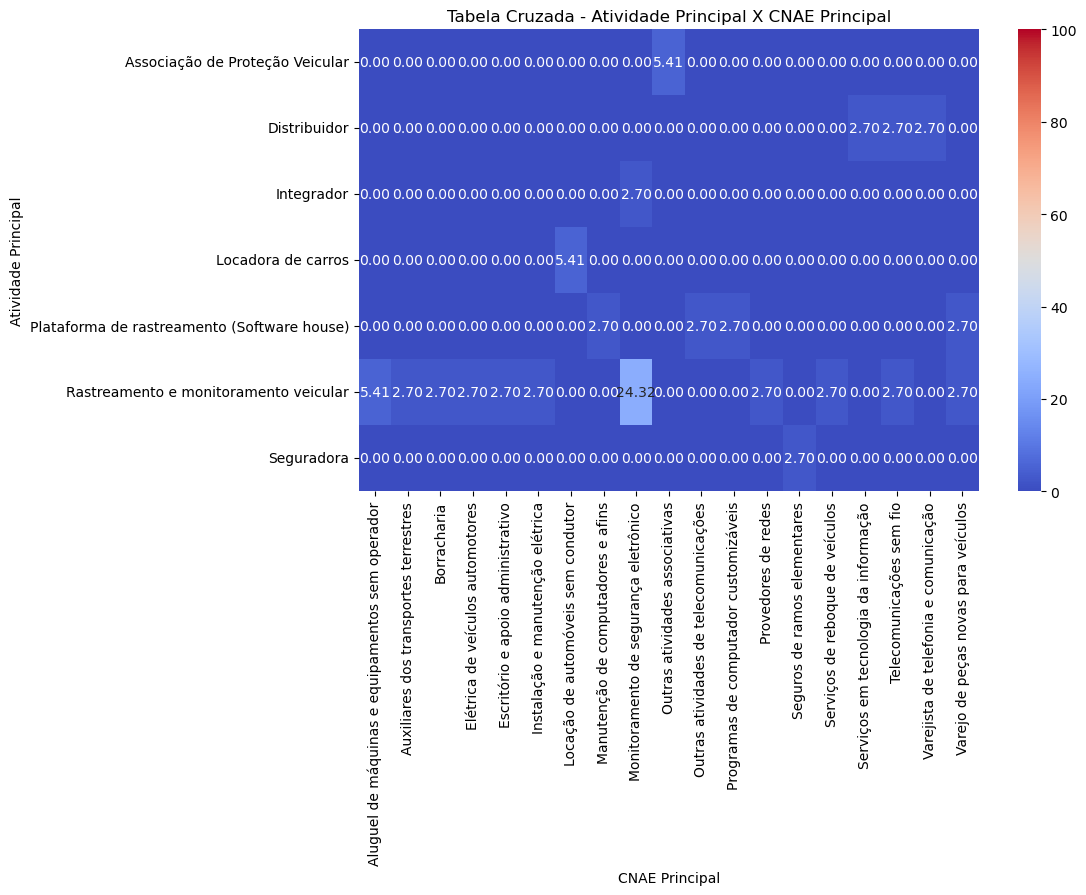

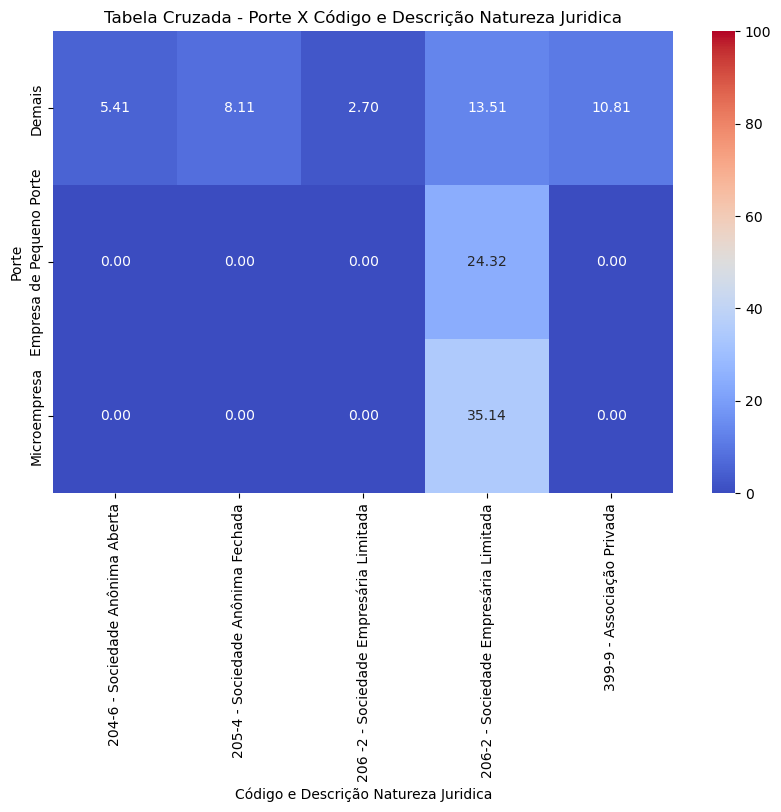

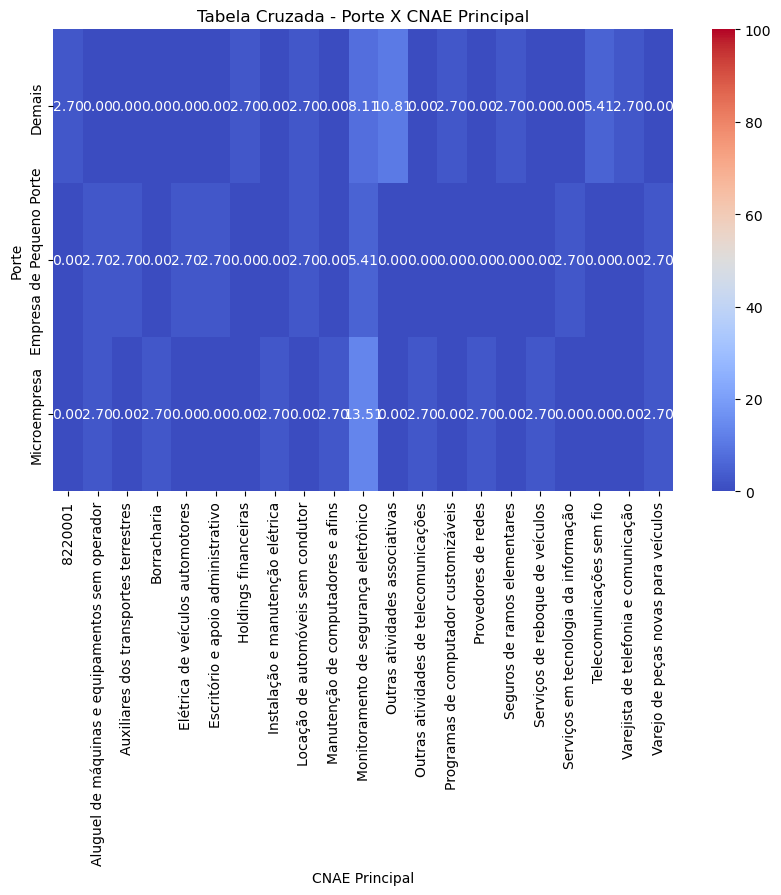

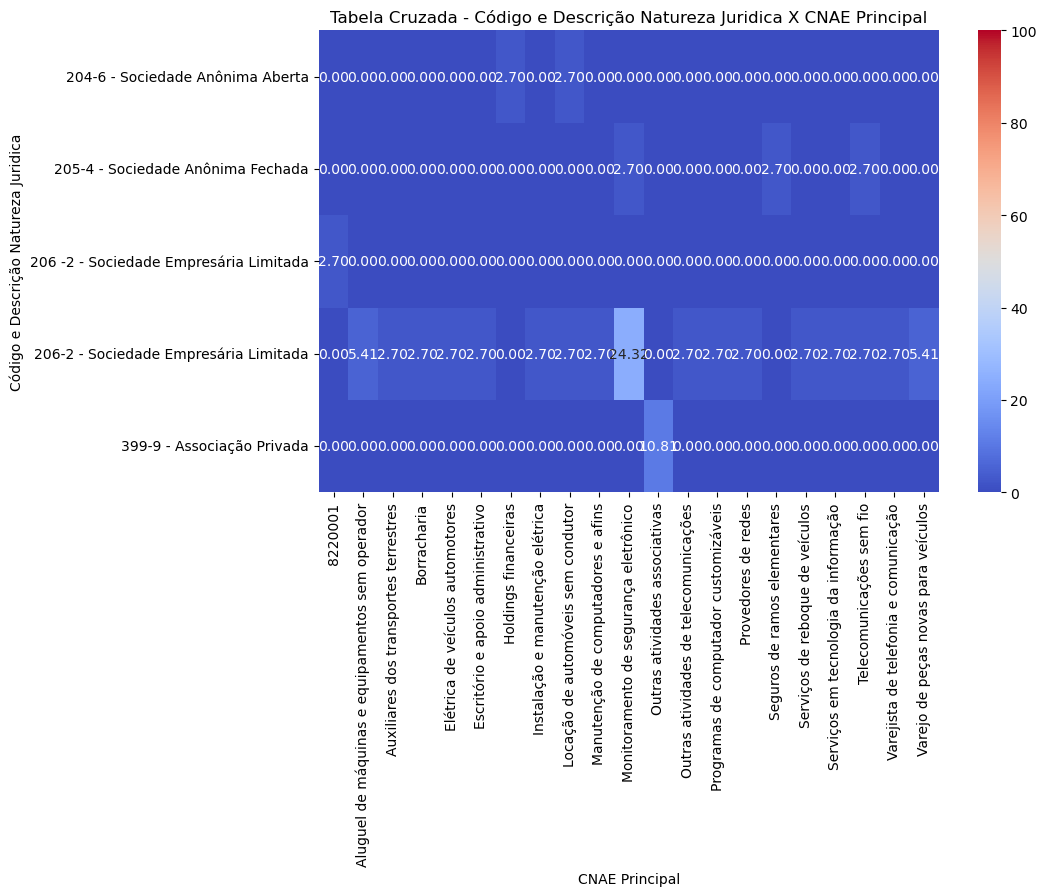

In [35]:
incluso = []
for coluna1 in df_c.columns:
    incluso.append(coluna1)
    for coluna2 in df_c.columns:
        if coluna2 not in incluso:
            plot_functions.contingência(df,coluna1,coluna2)

## Variáveis numéricas filtradas por categorias

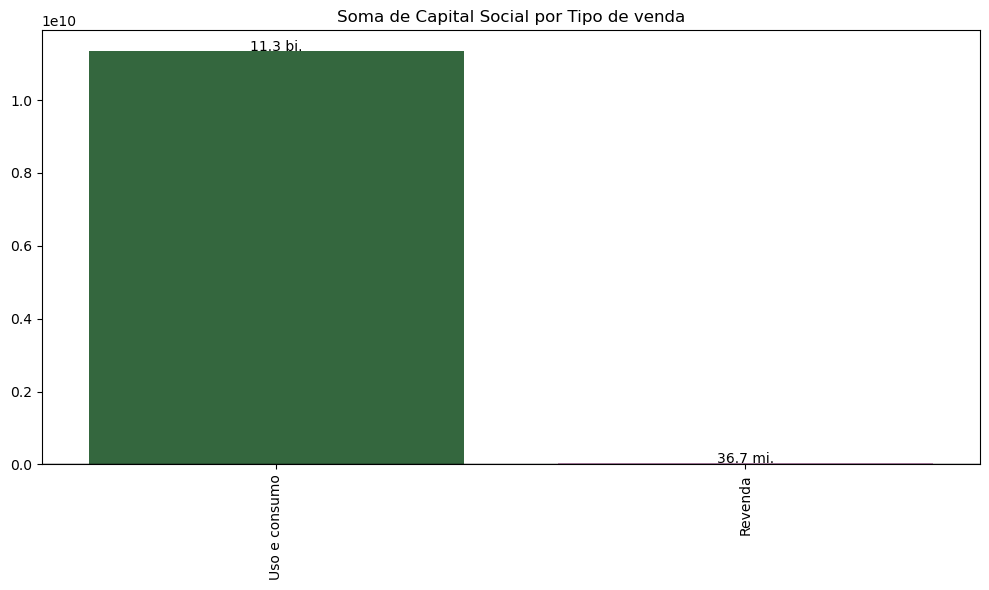

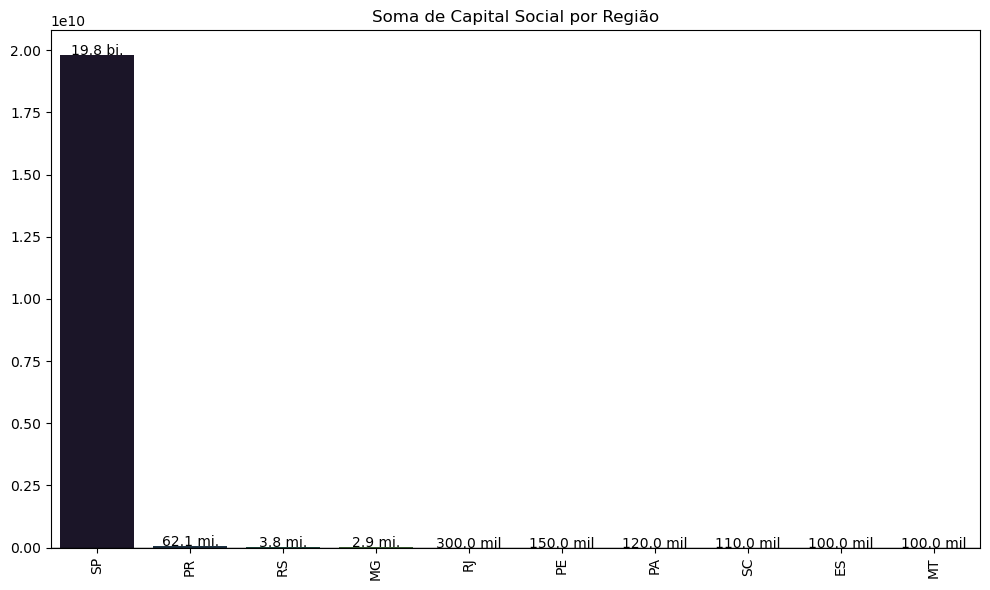

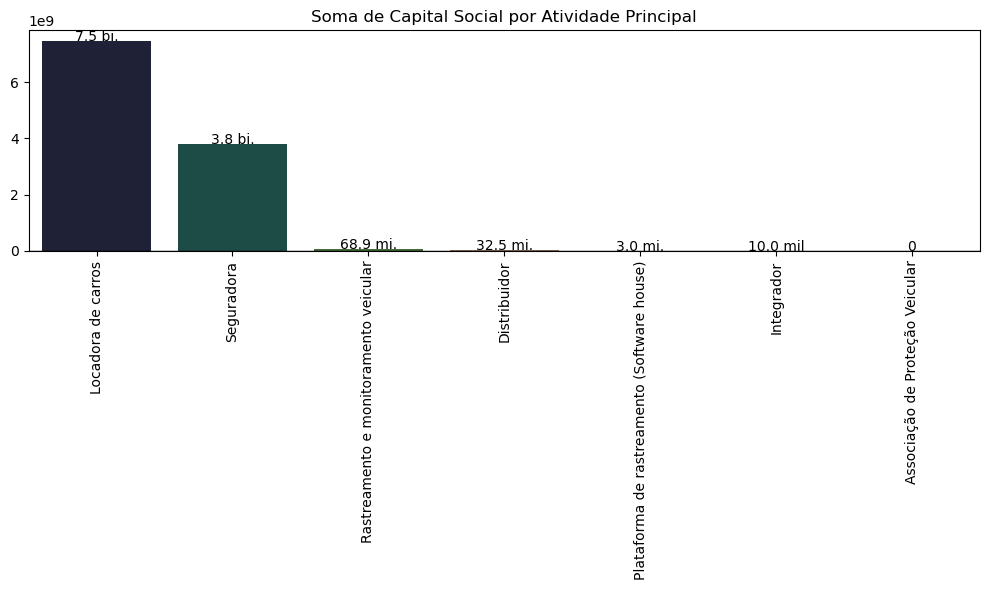

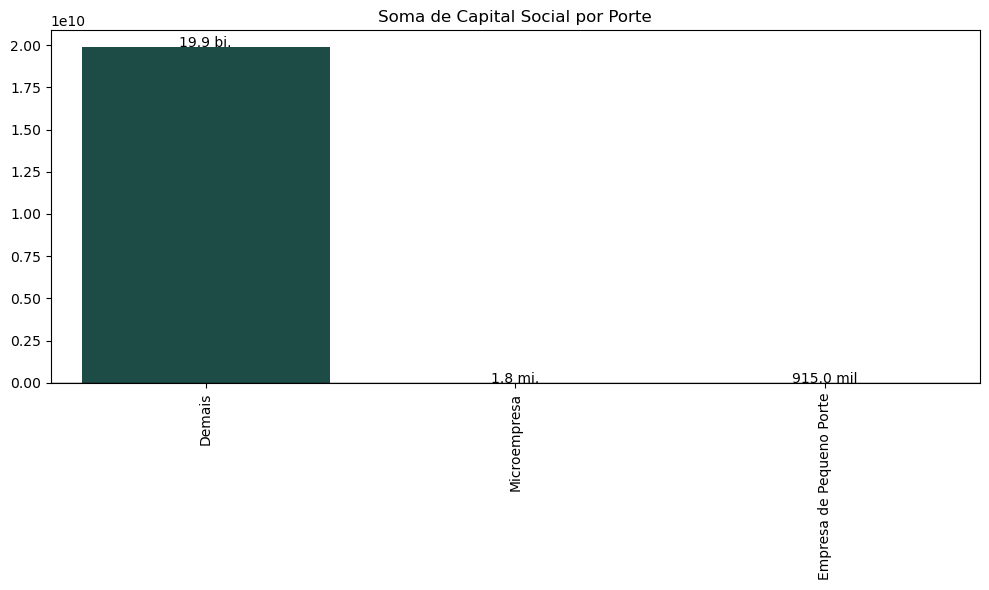

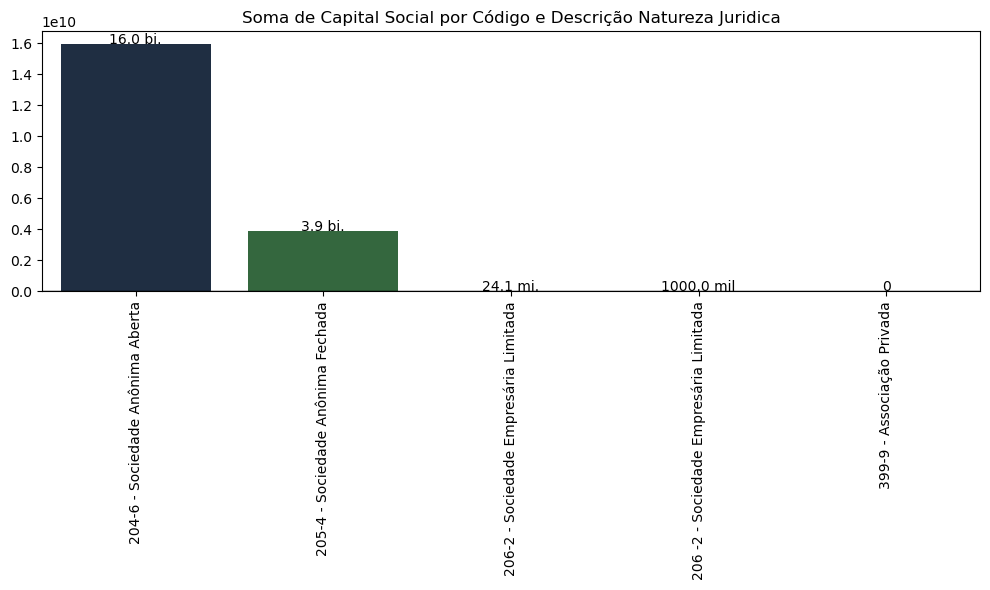

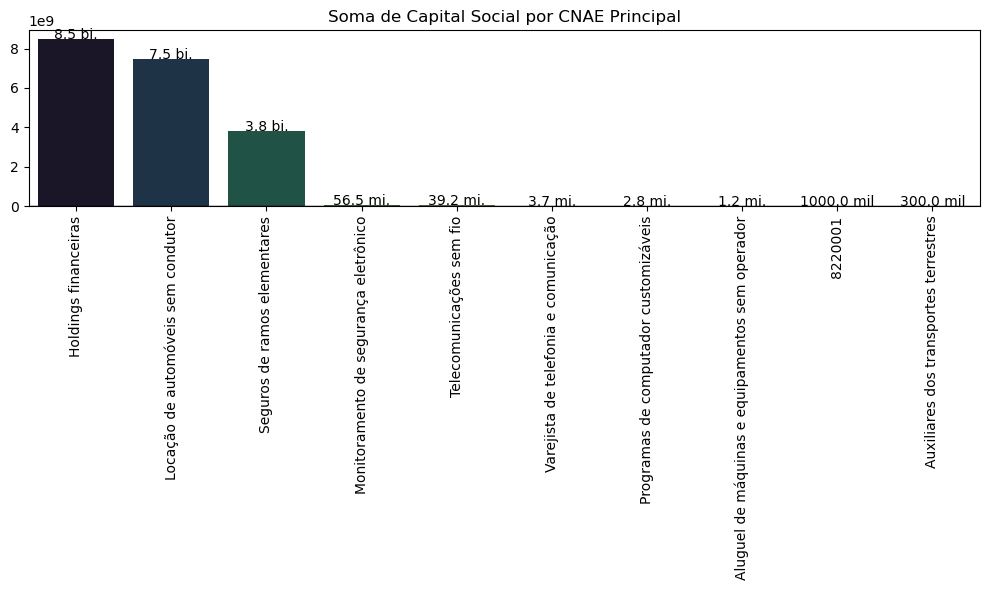

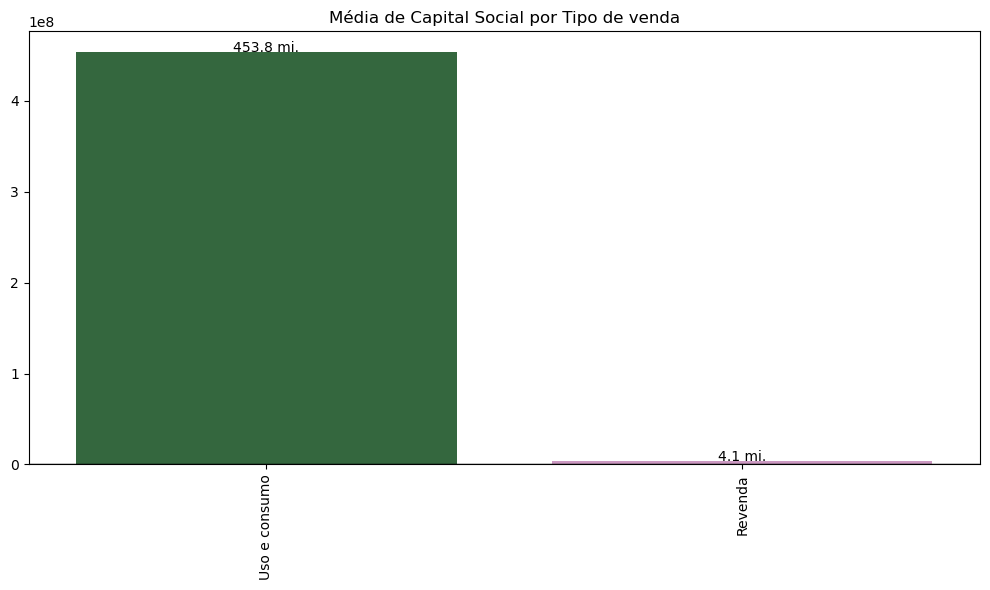

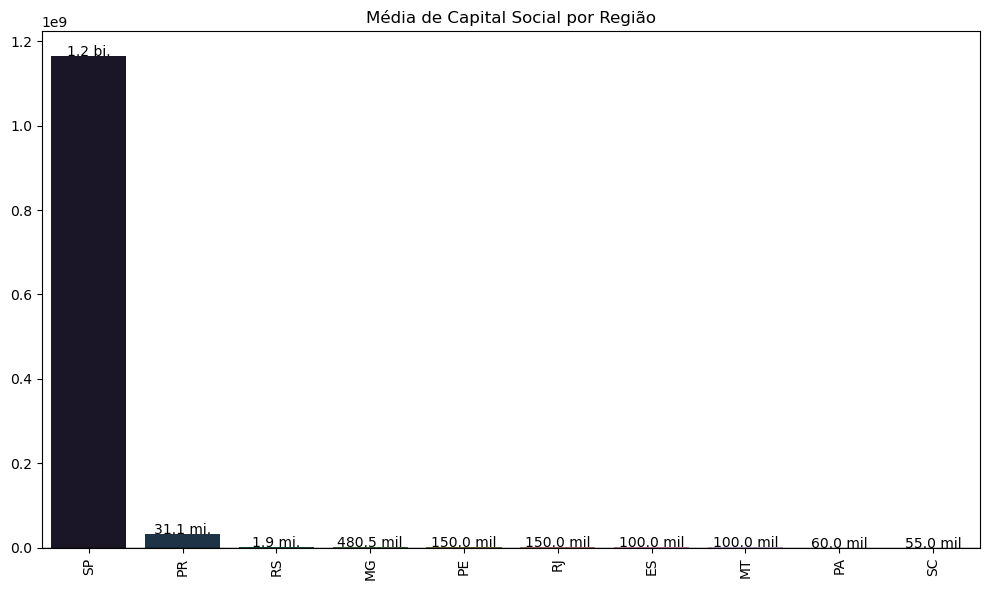

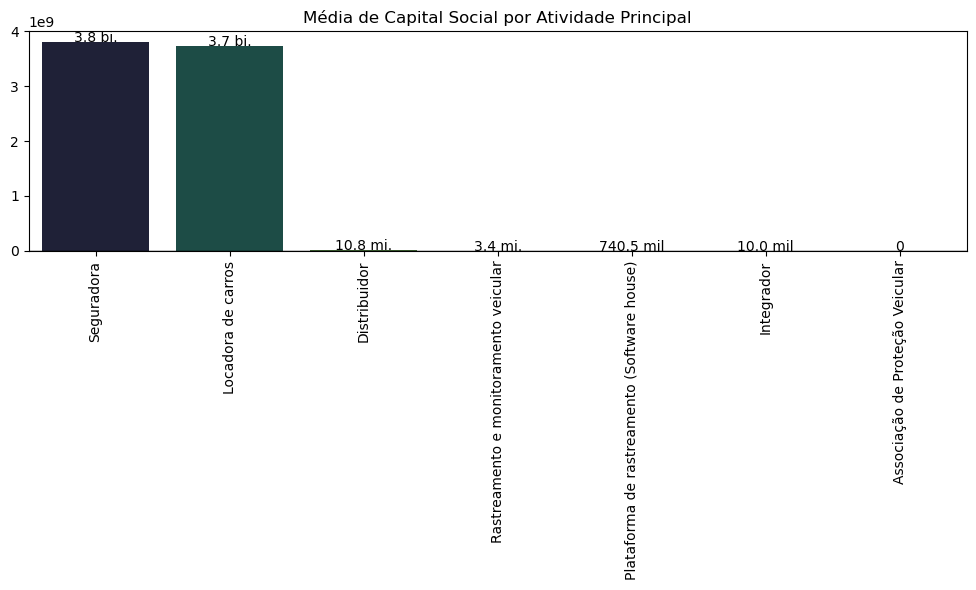

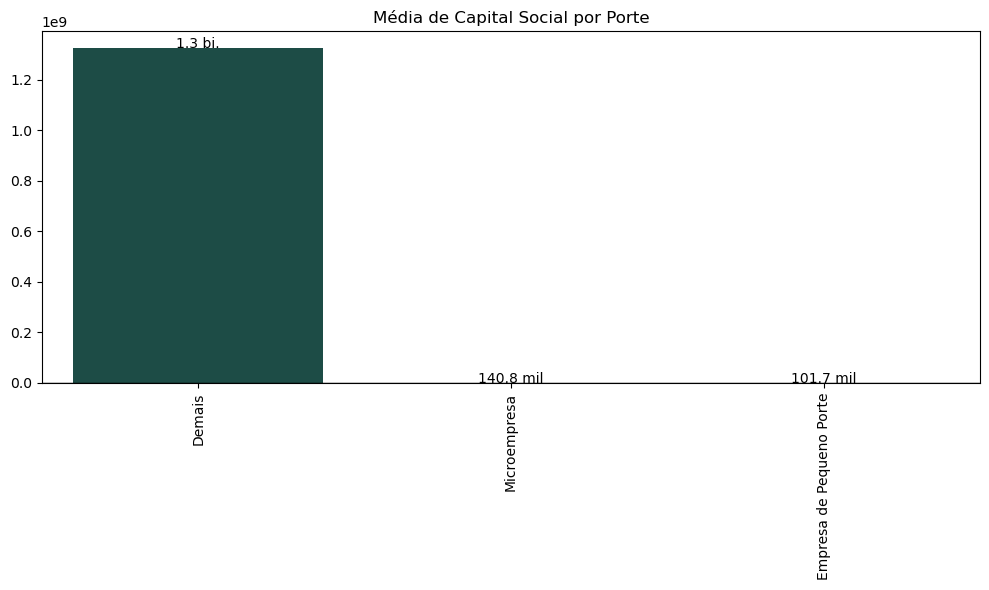

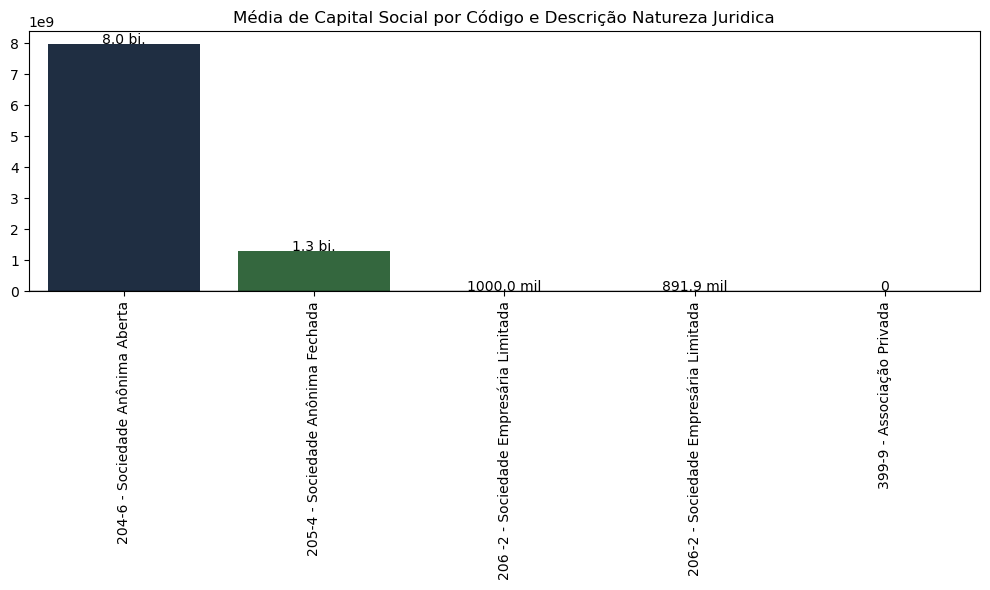

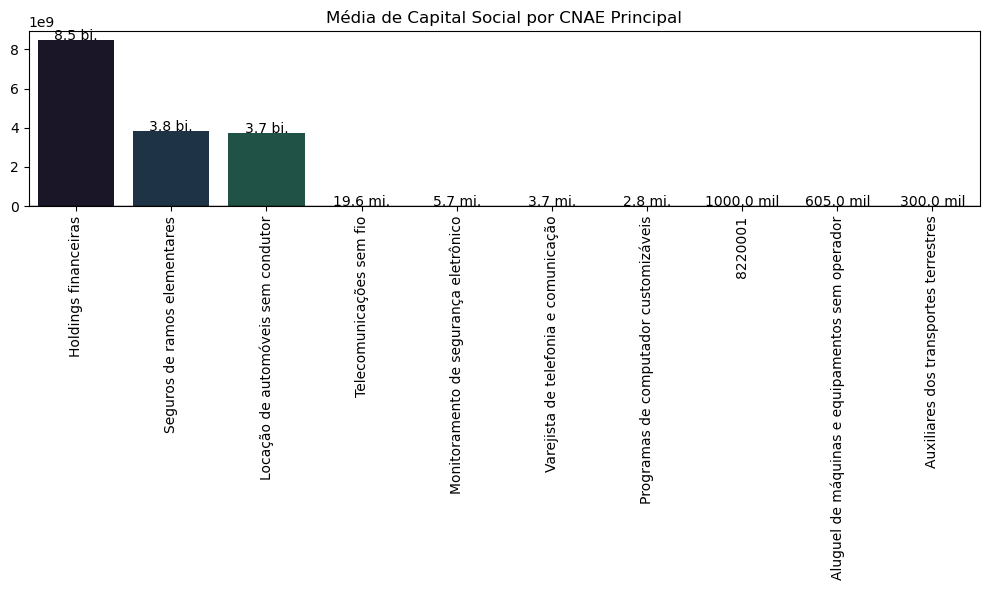

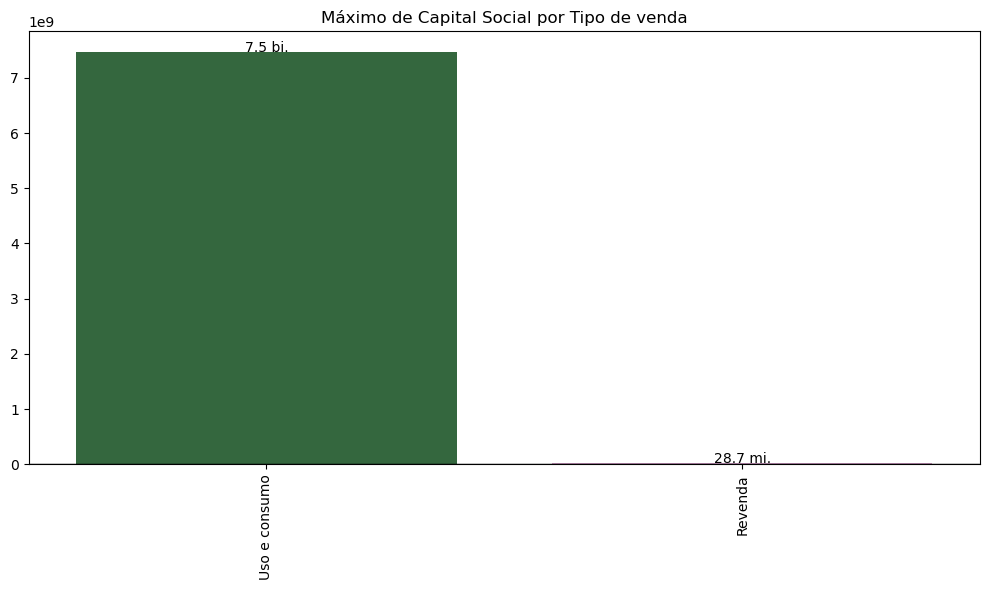

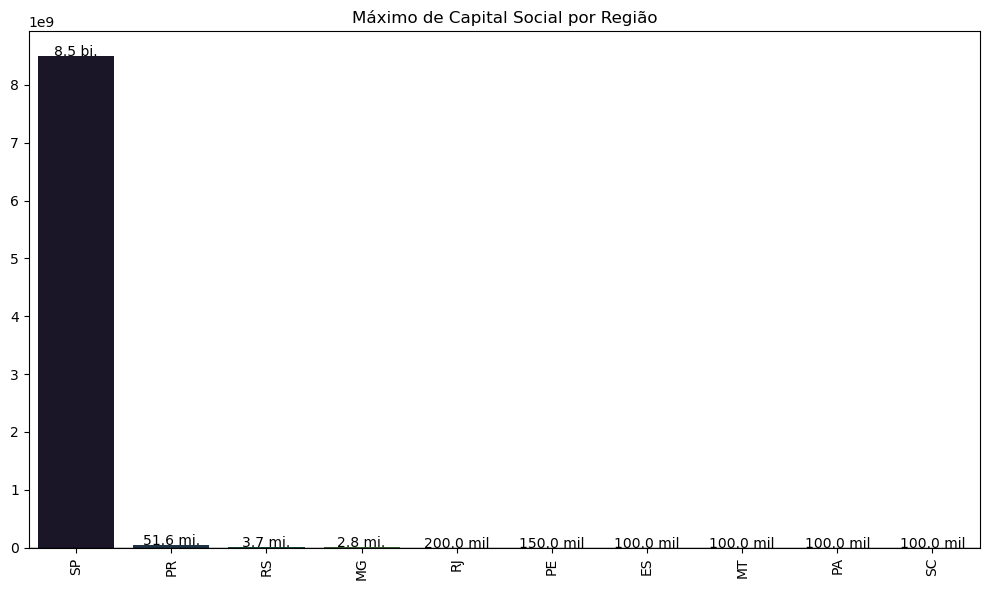

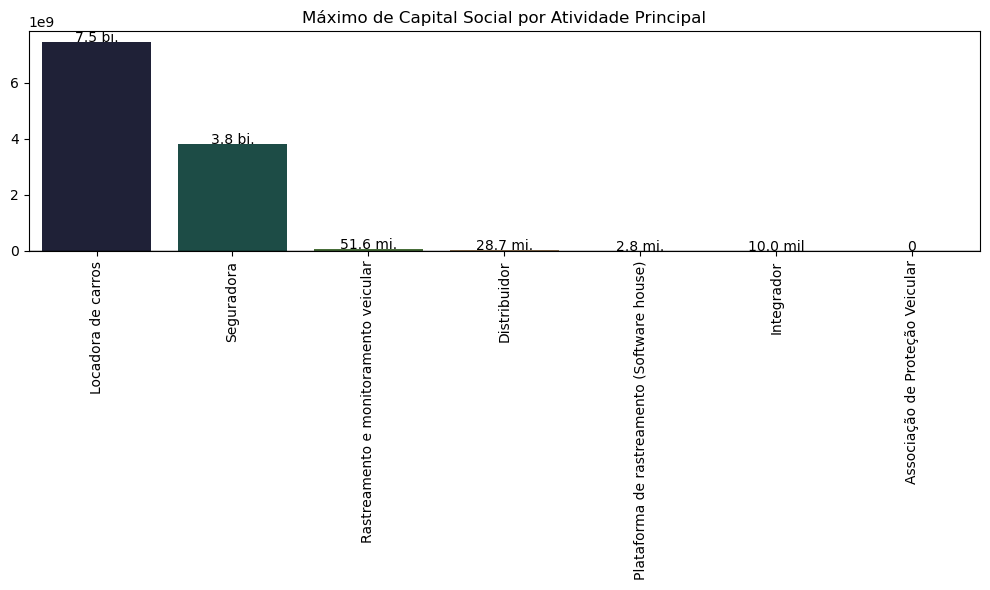

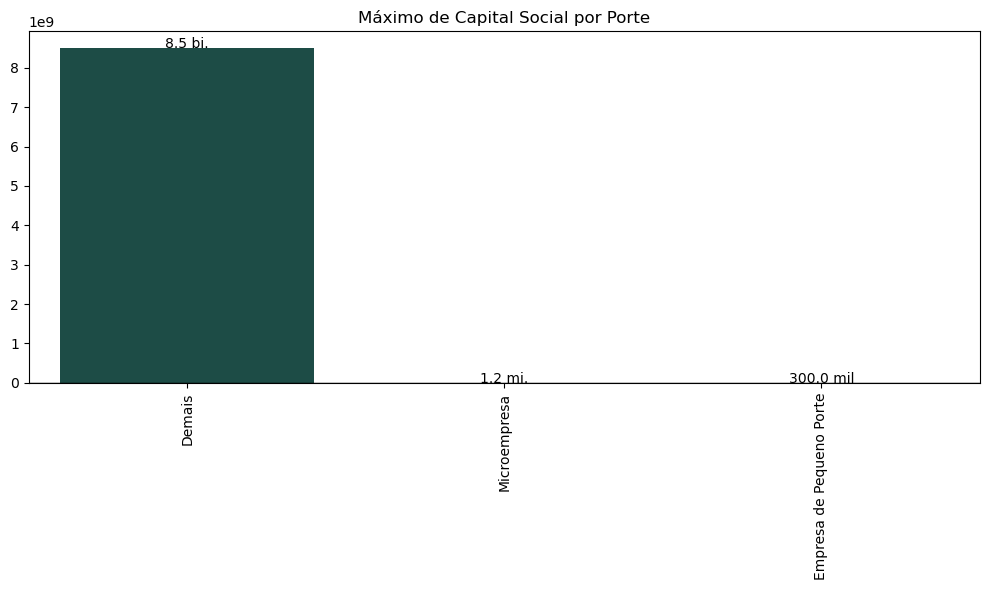

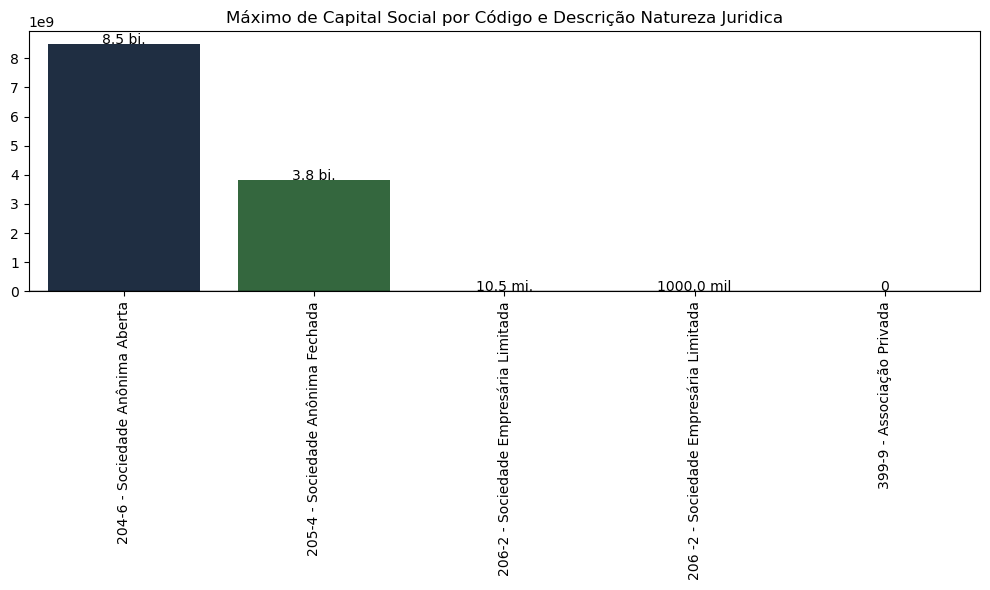

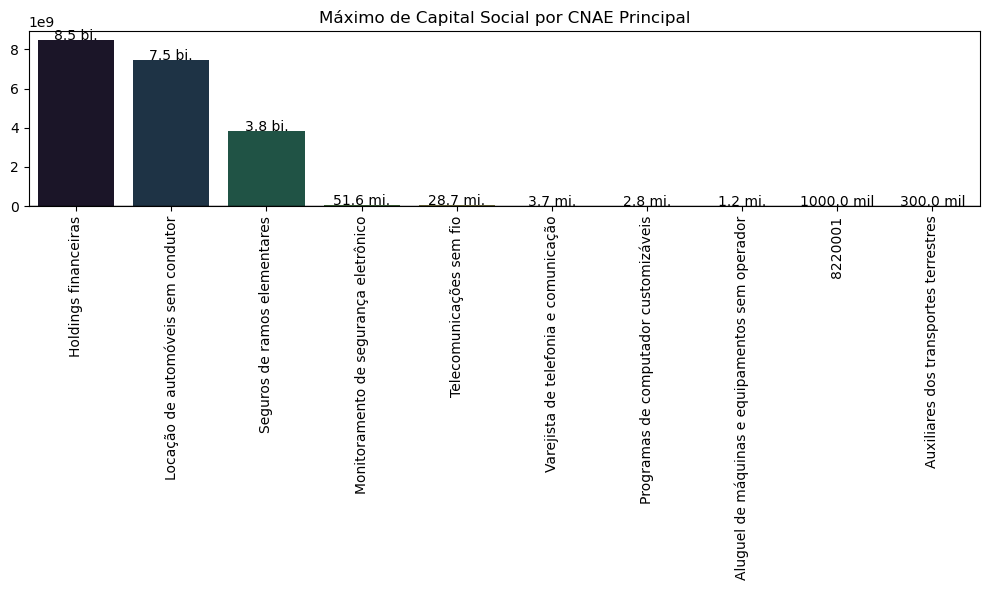

In [36]:
n_vars = df_n.columns
c_vars = df_c.columns

medidas = ('Soma','Média','Máximo')

for medida in medidas:
    for Categoria in c_vars:
        for Valor in n_vars:
            plot_functions.valor_por_categorias(df_t,Categoria,Valor,medida)

# Investigação de dados anômalos

A concentração de valores "0" na variável "capital social" sucita dúvidas sobre a integridade dos dados e exige uma investigação pormenorizada.

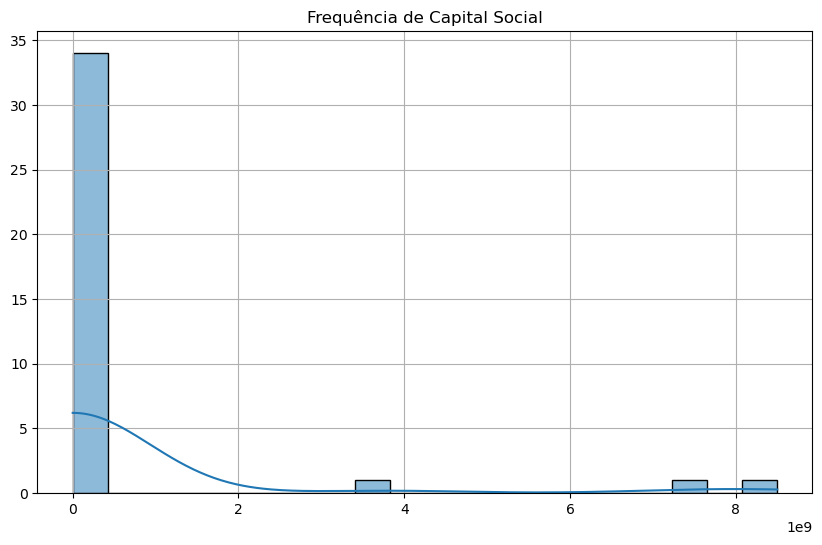

In [37]:
for col in df_n.columns:
    plot_functions.histograma(df_n,col,f'Frequência de {col}')

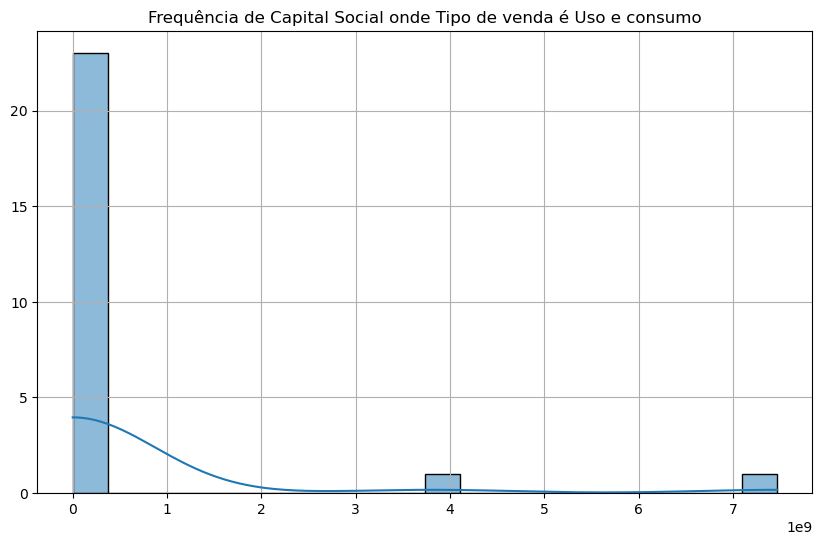

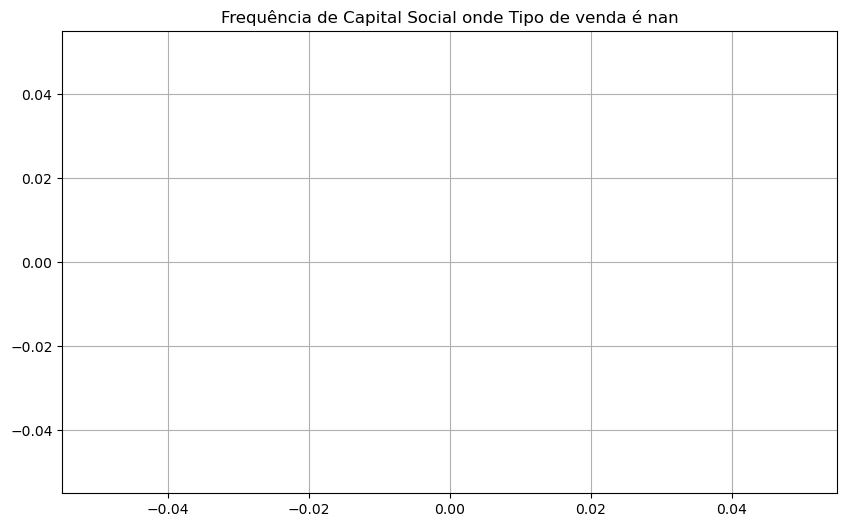

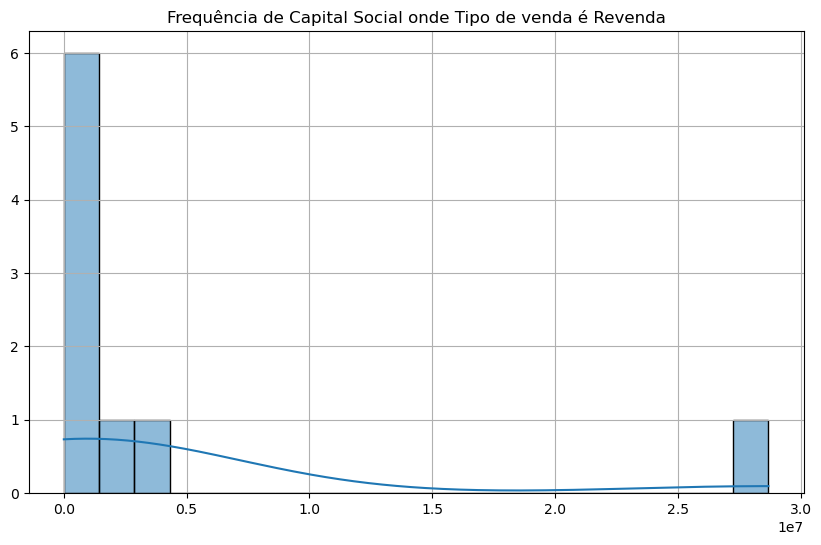

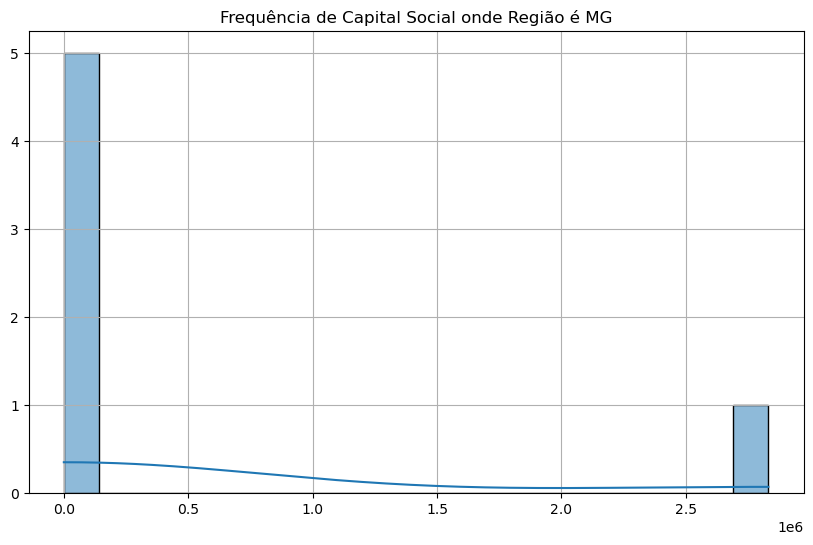

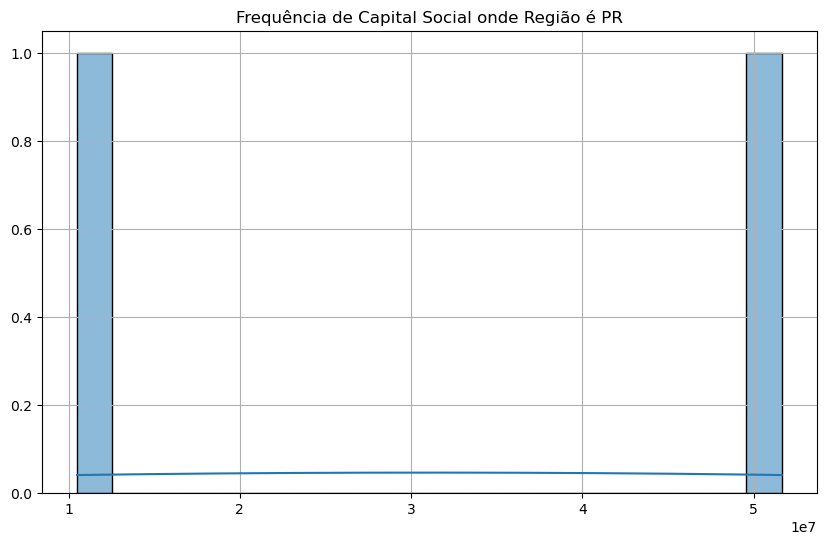

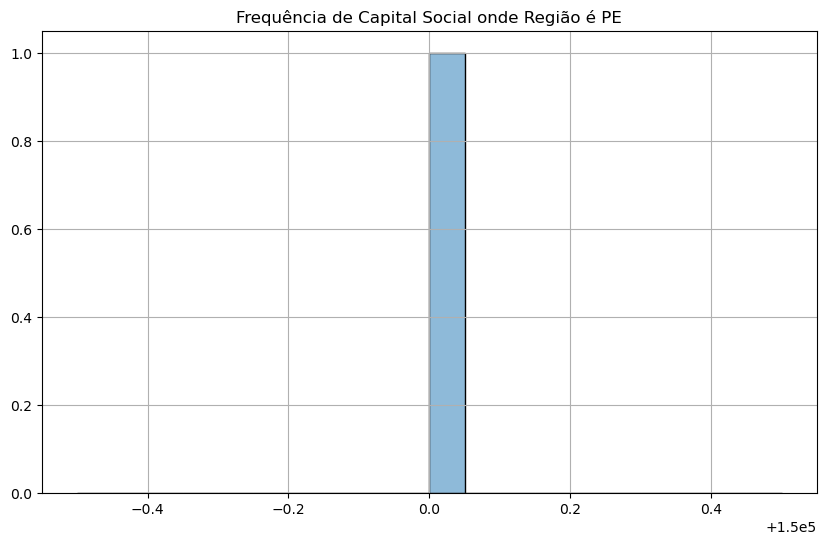

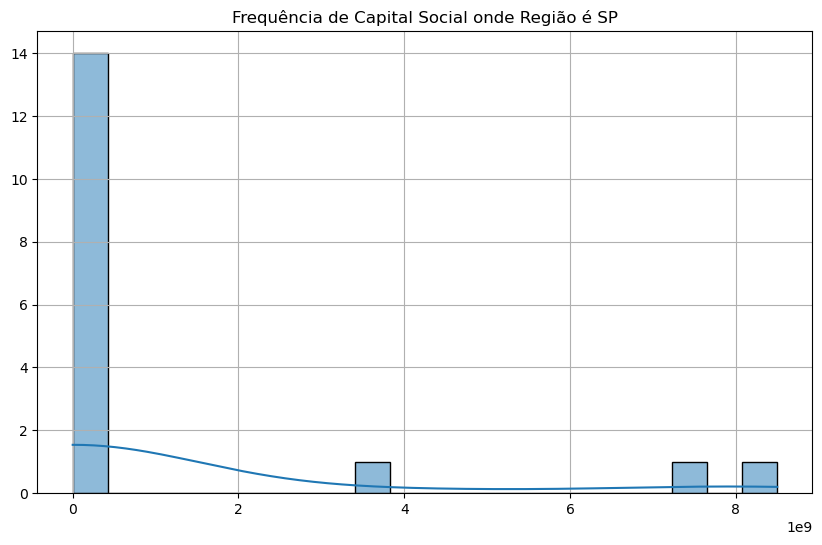

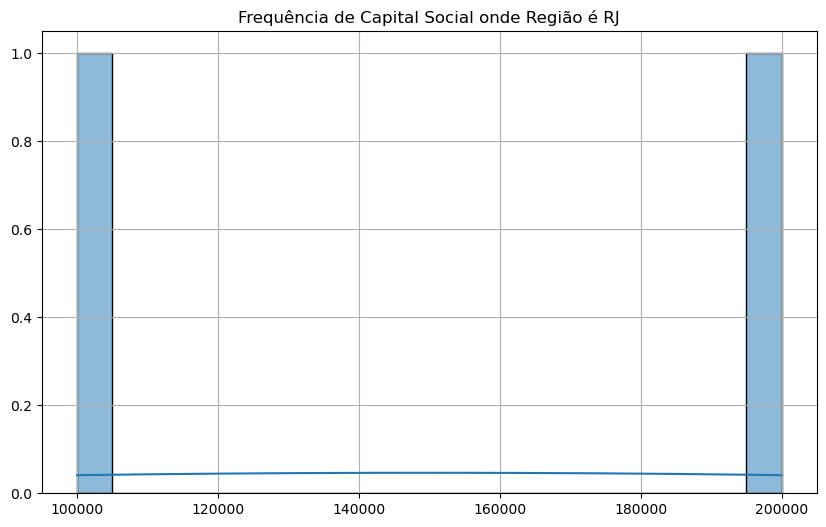

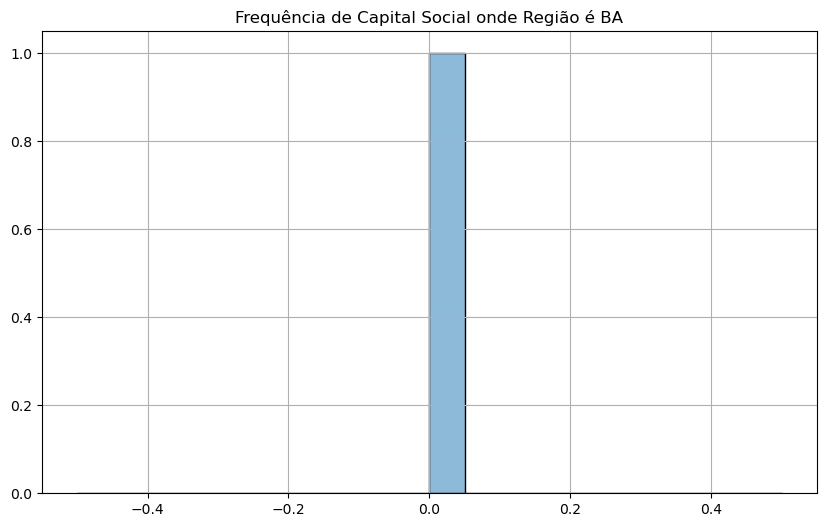

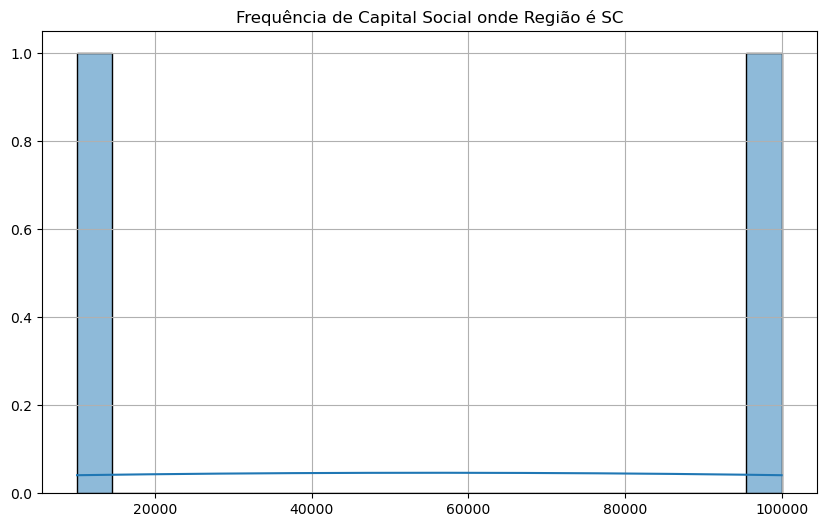

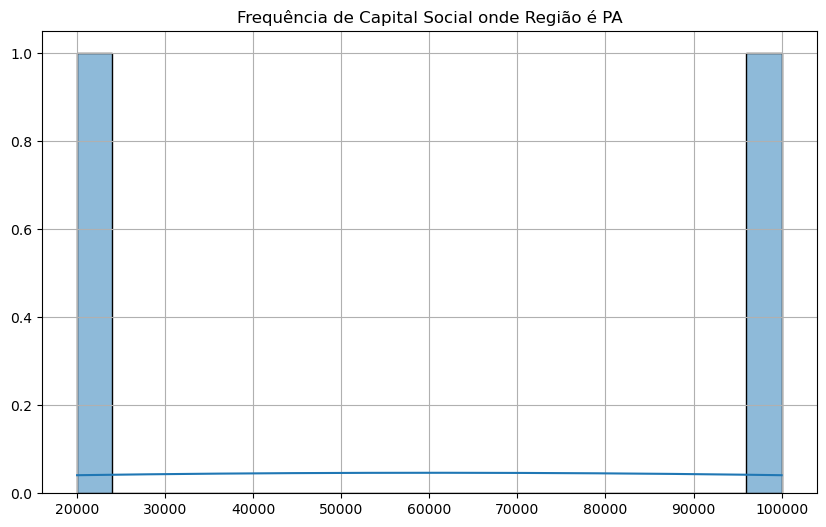

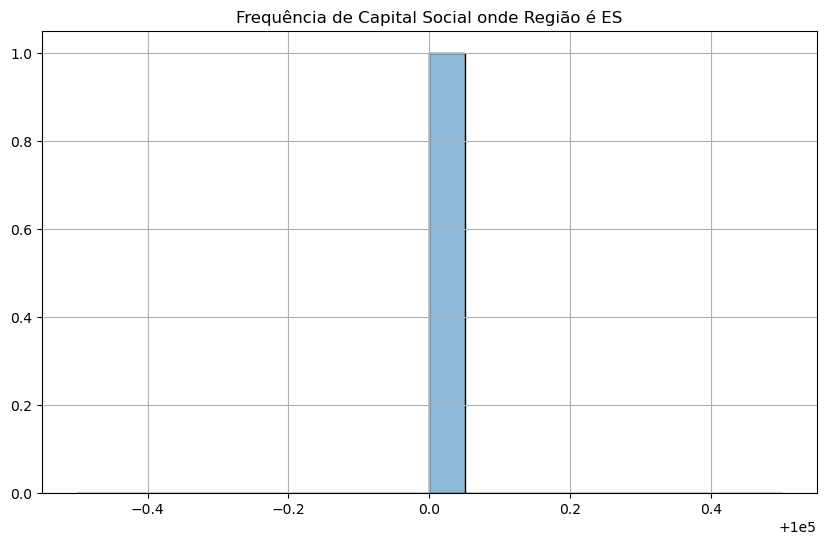

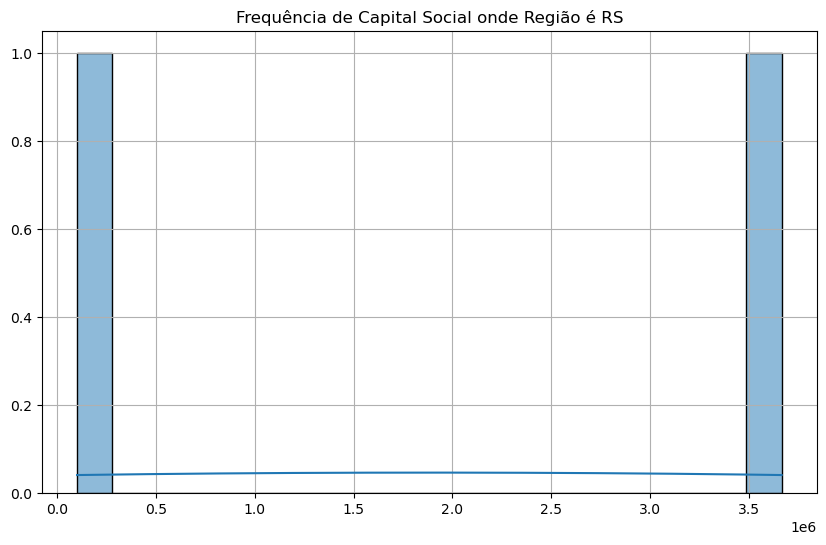

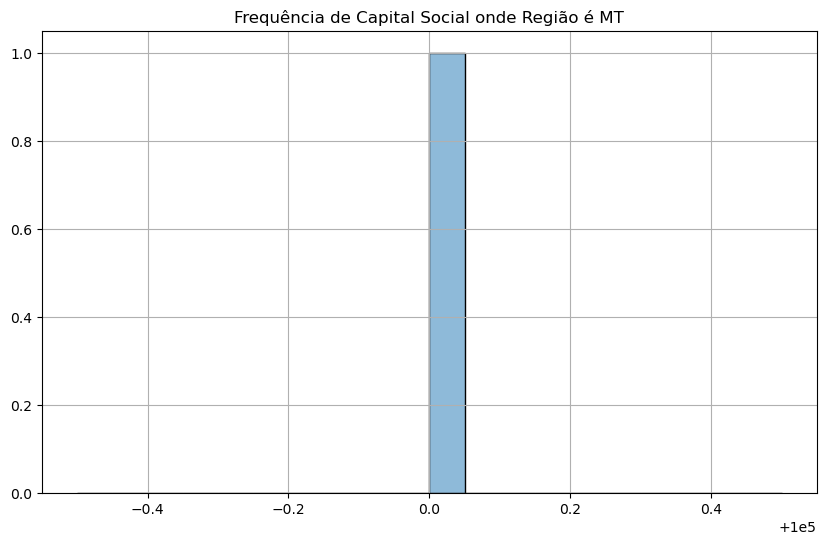

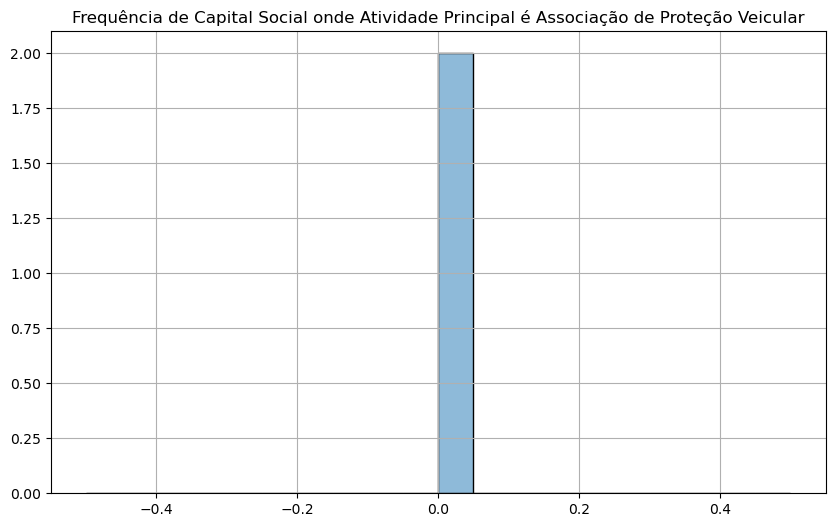

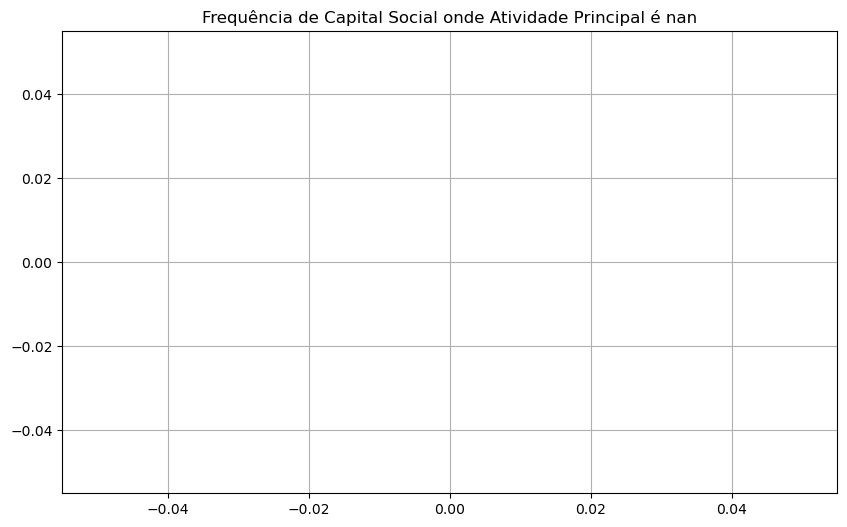

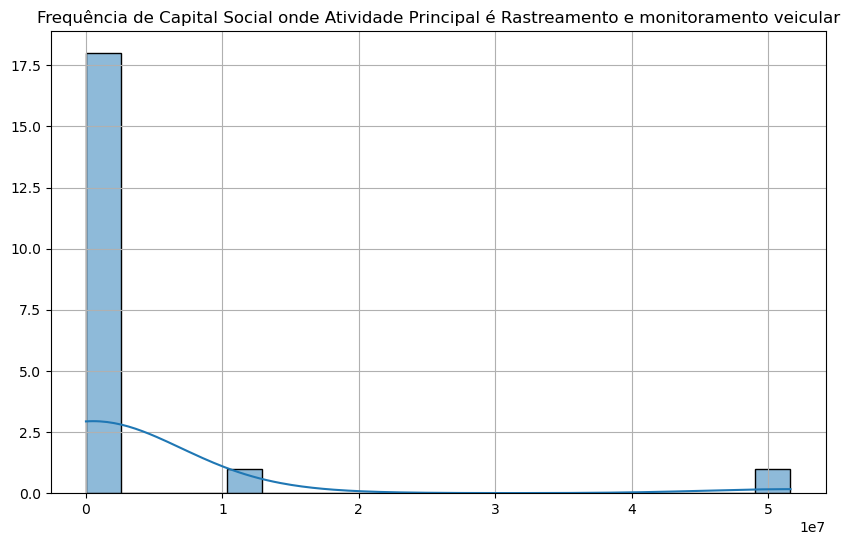

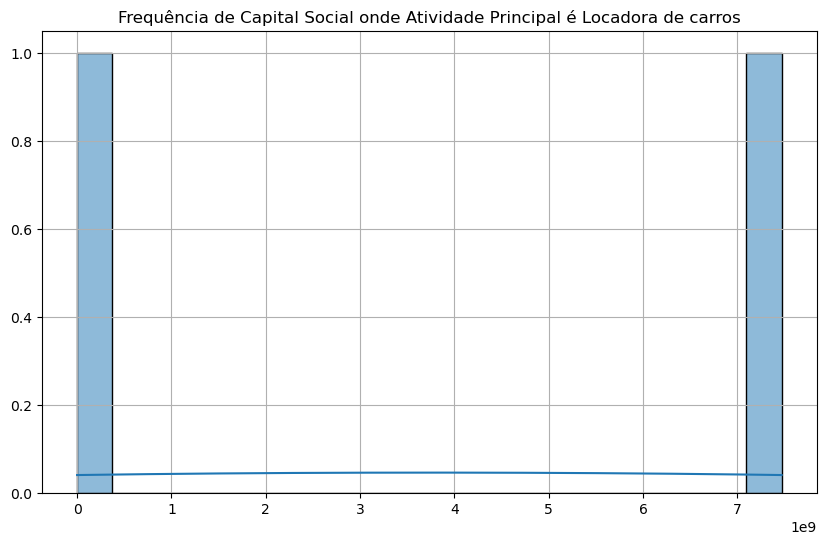

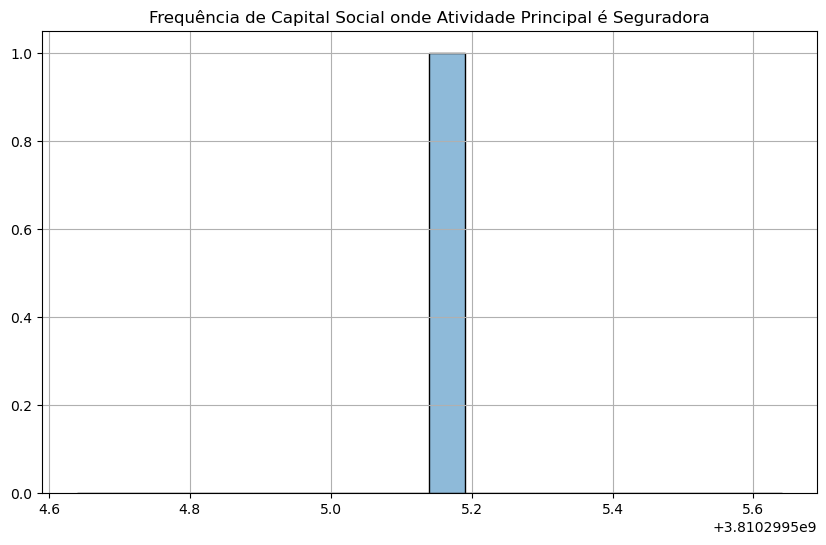

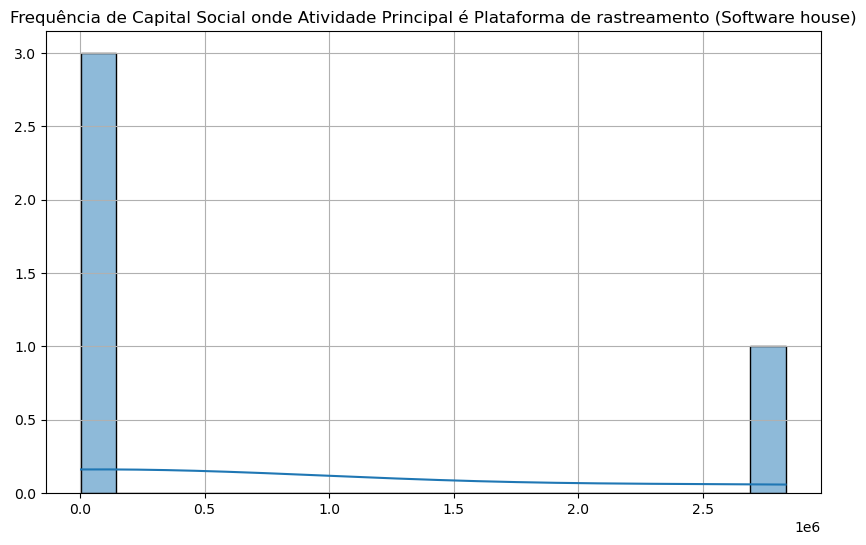

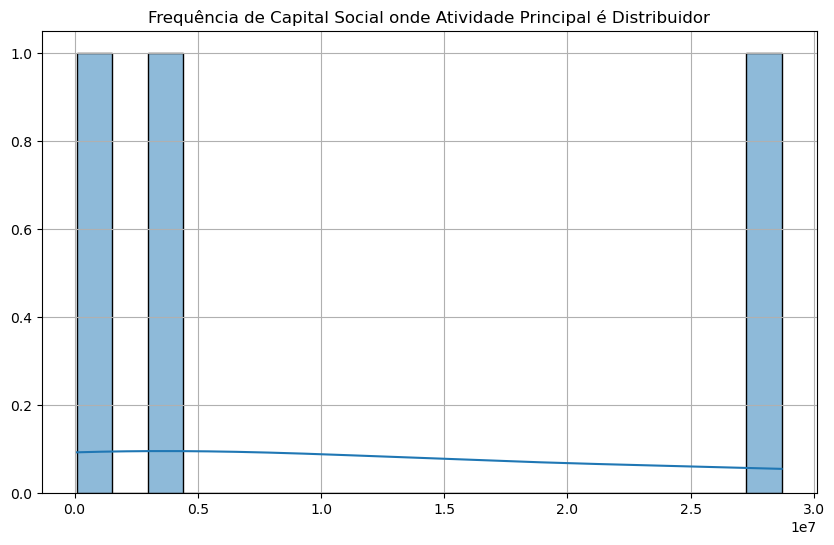

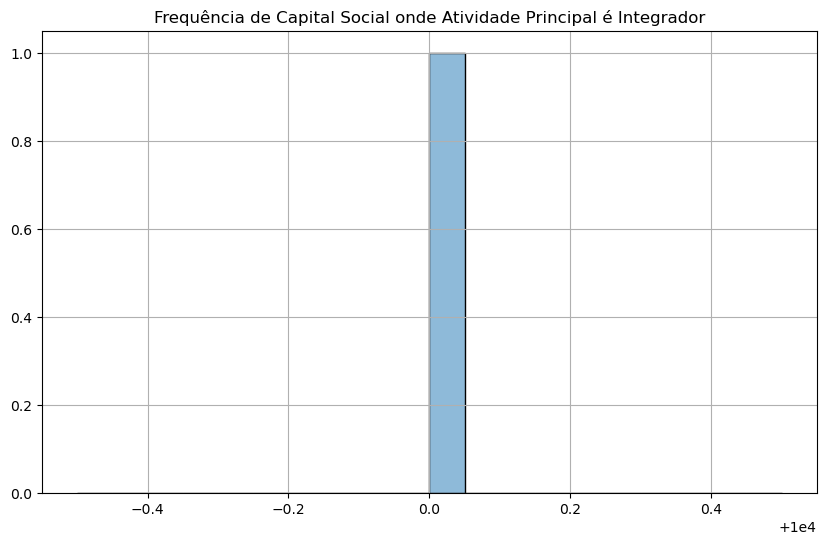

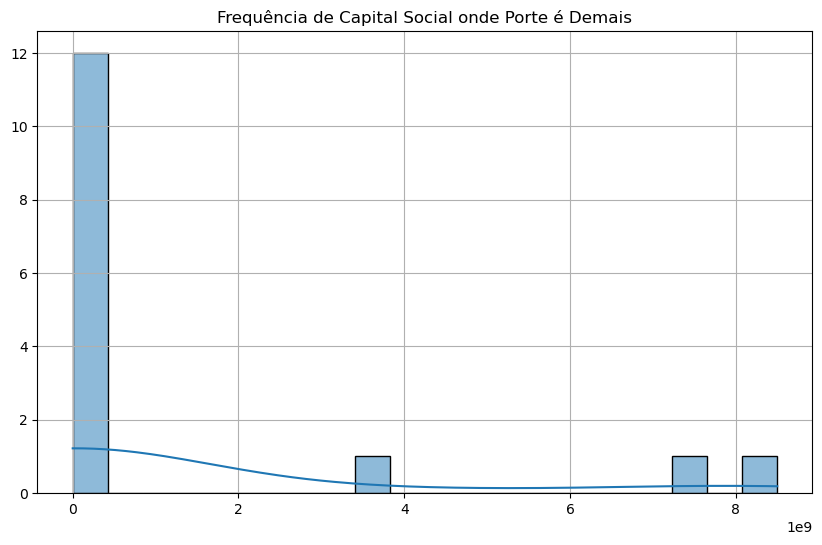

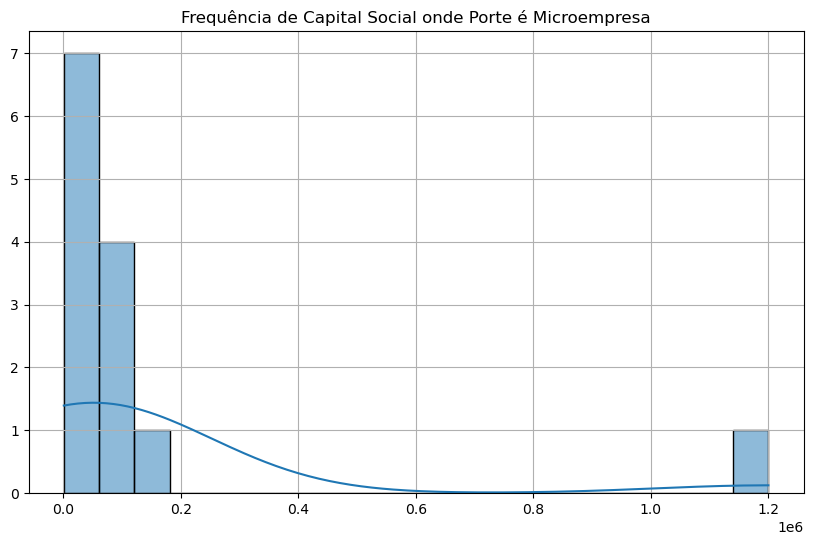

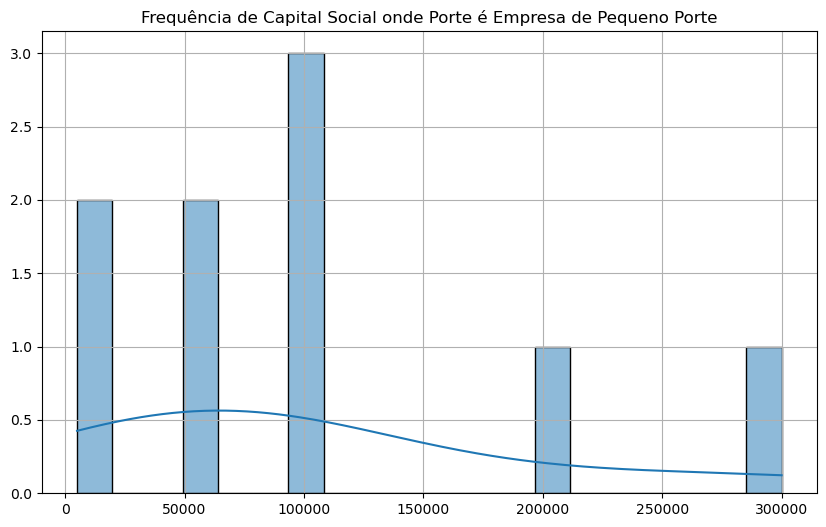

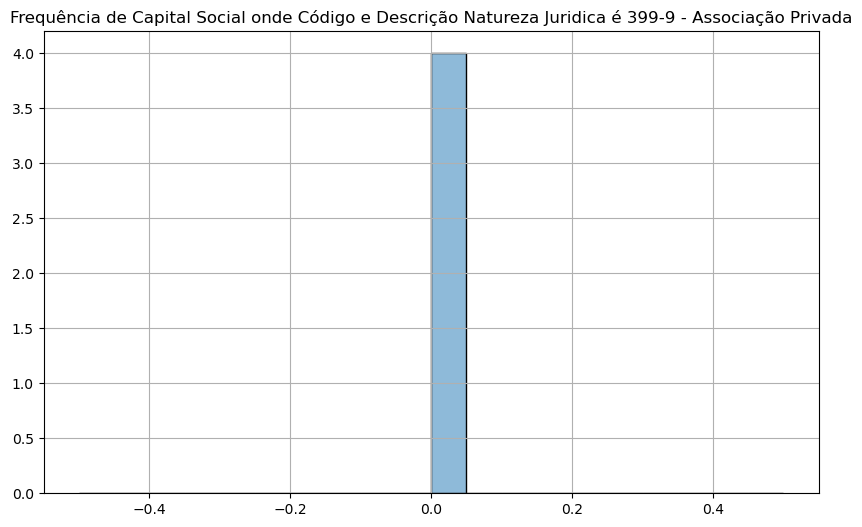

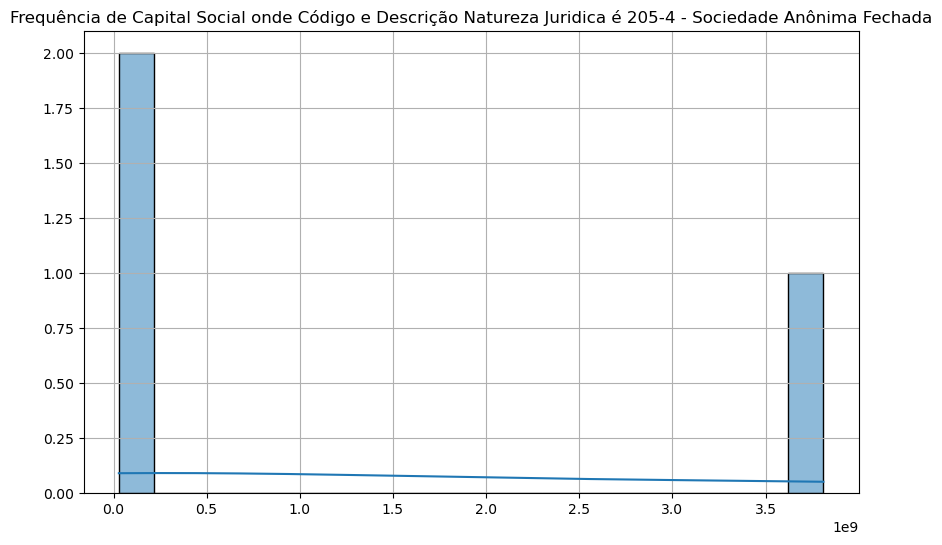

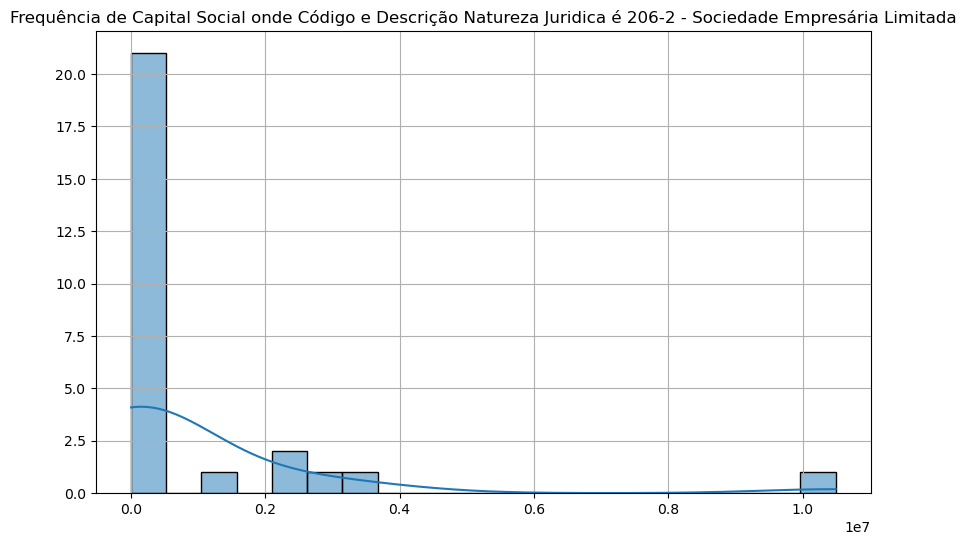

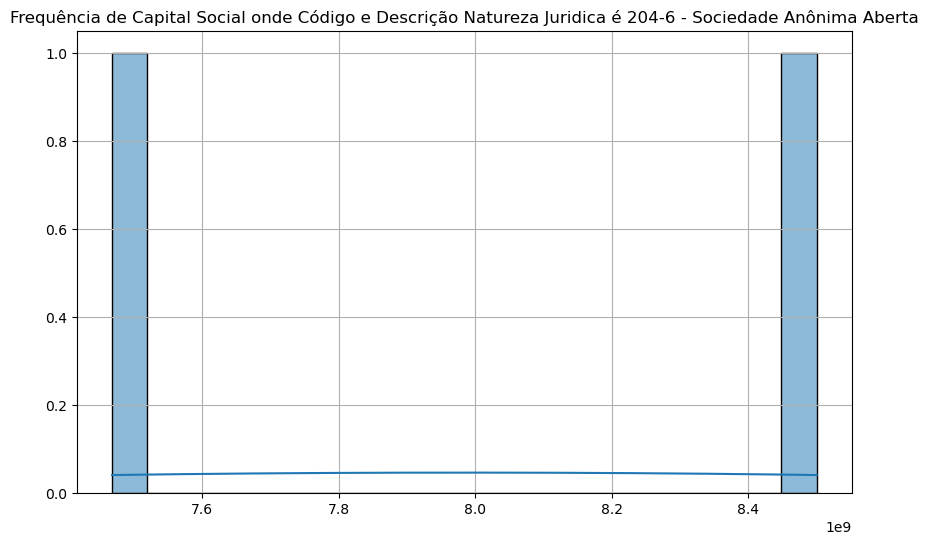

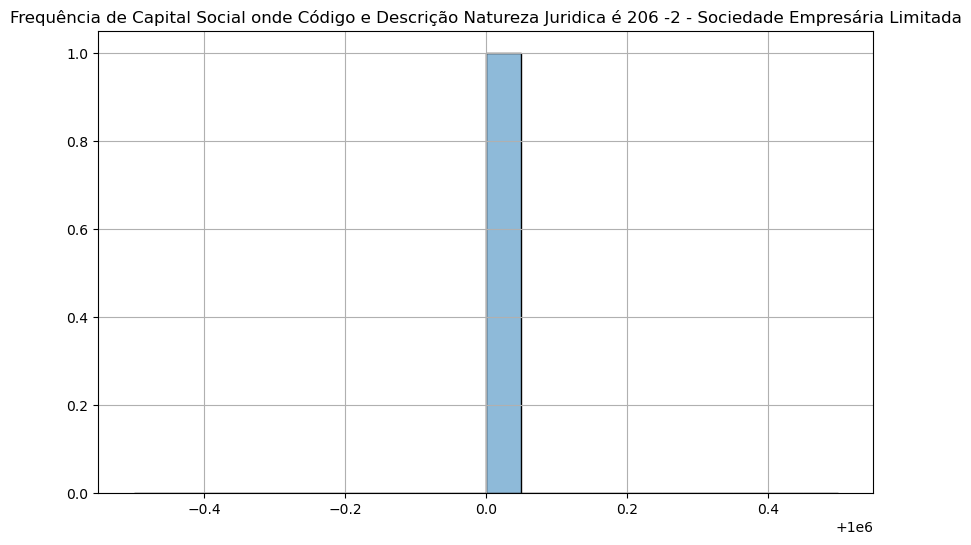

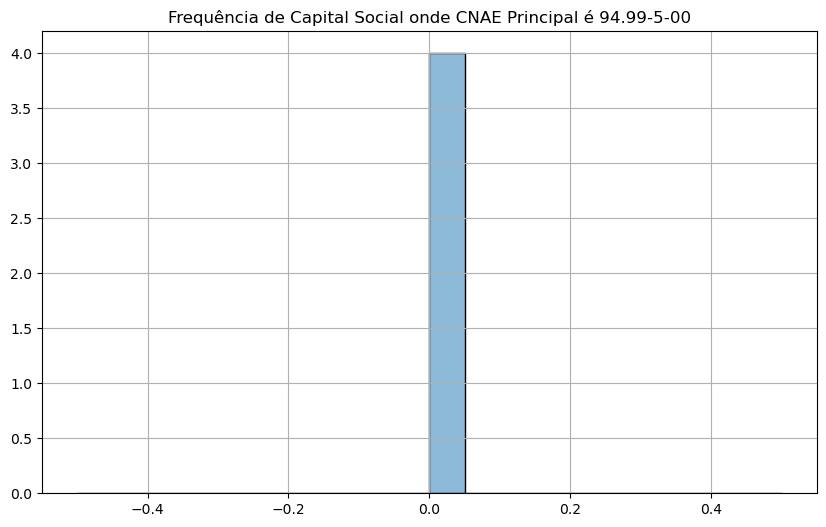

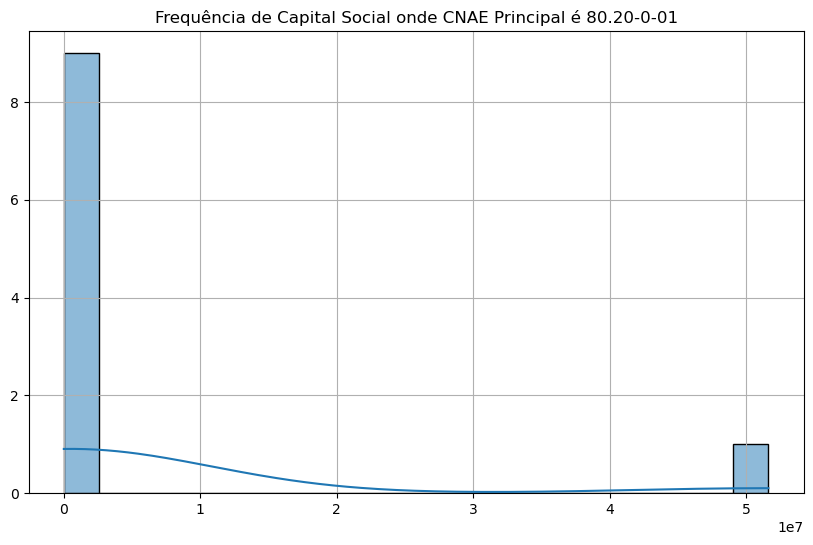

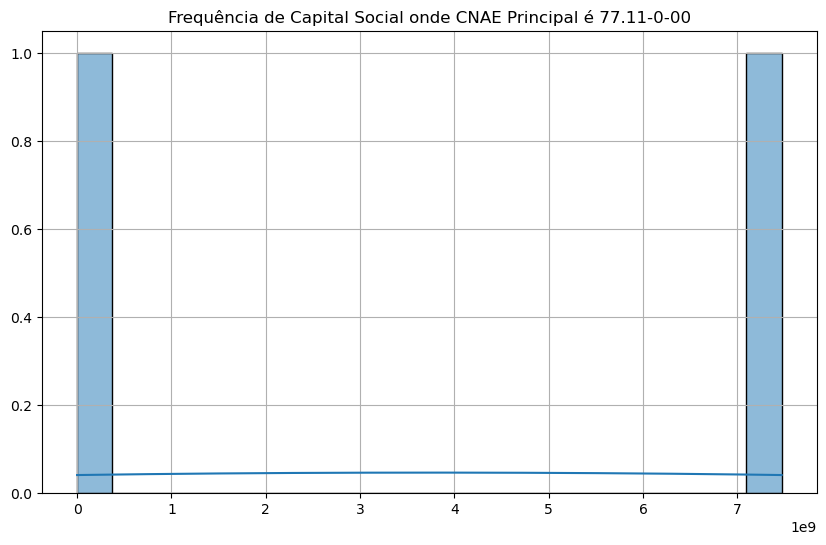

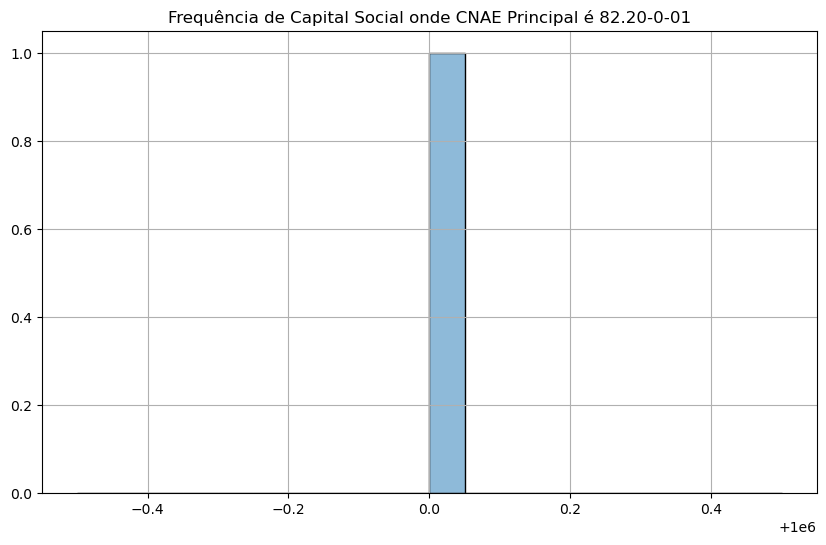

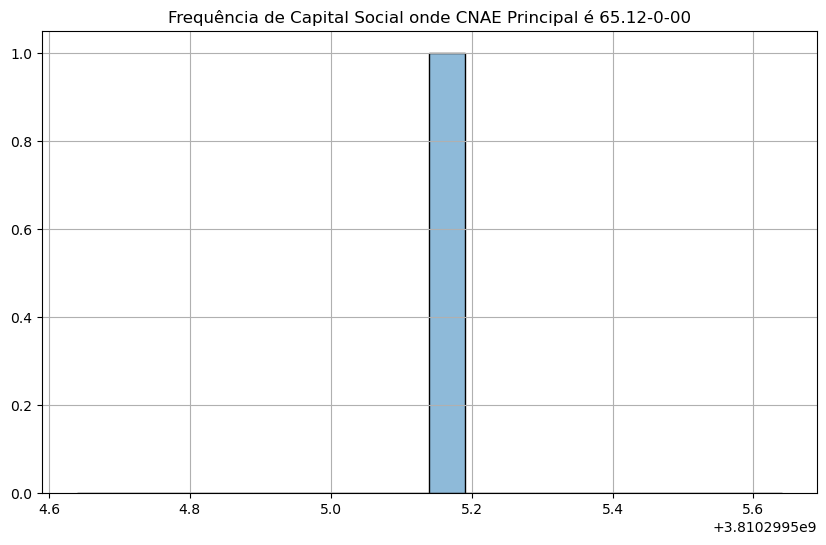

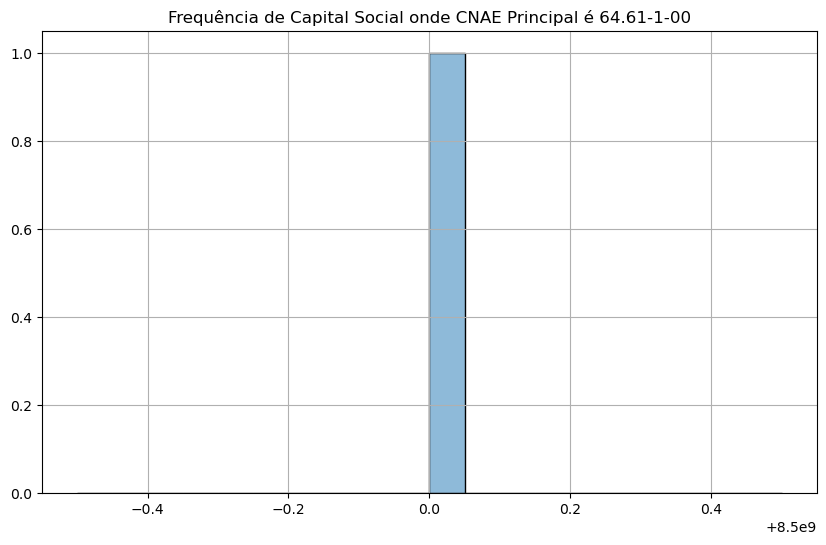

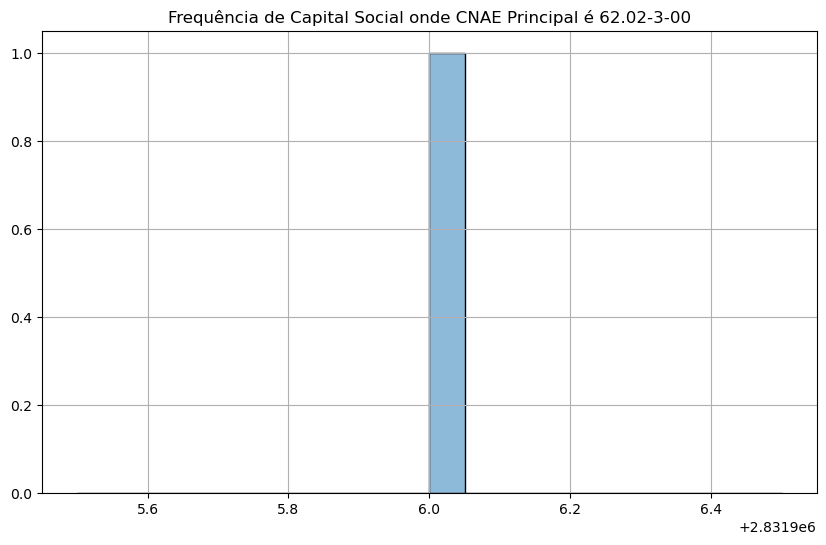

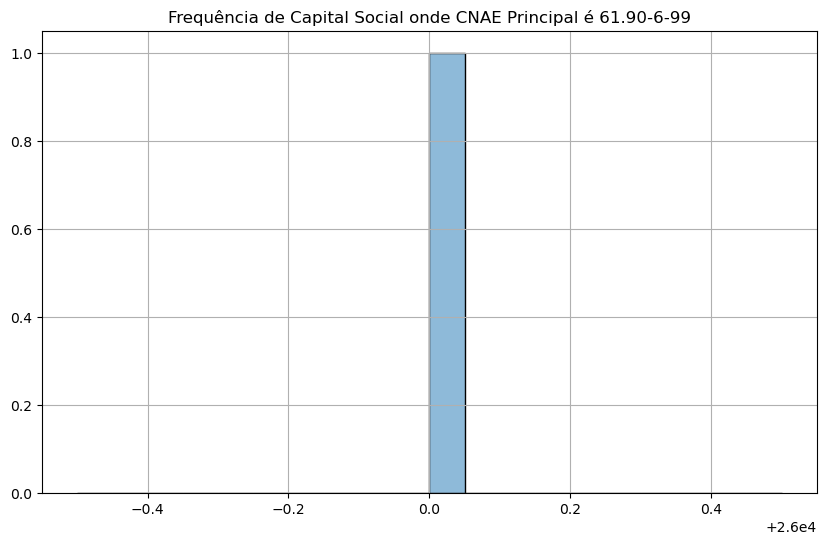

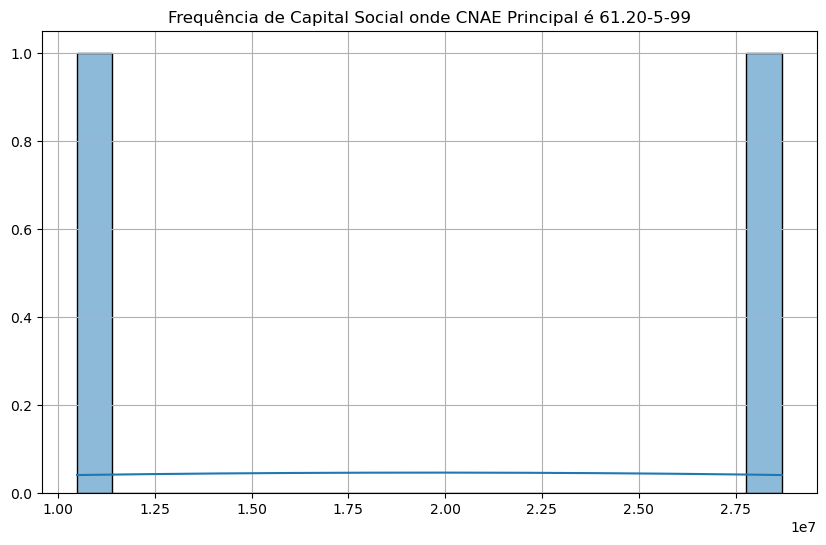

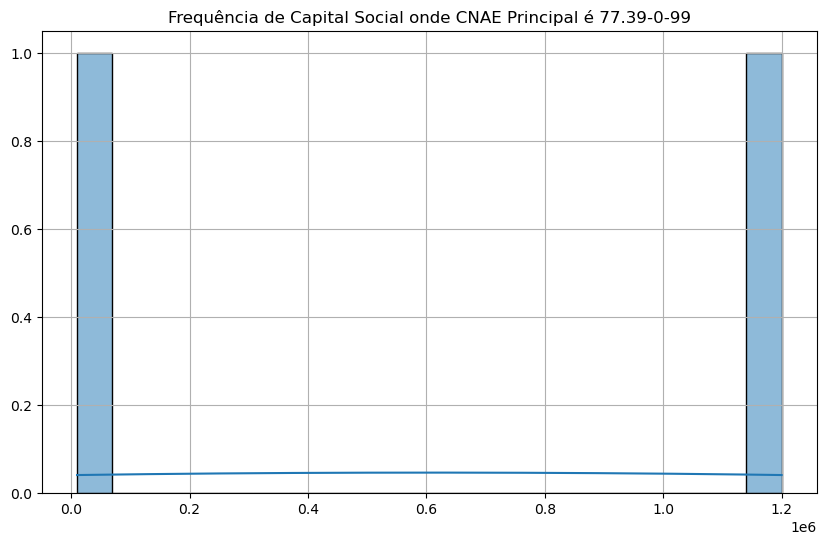

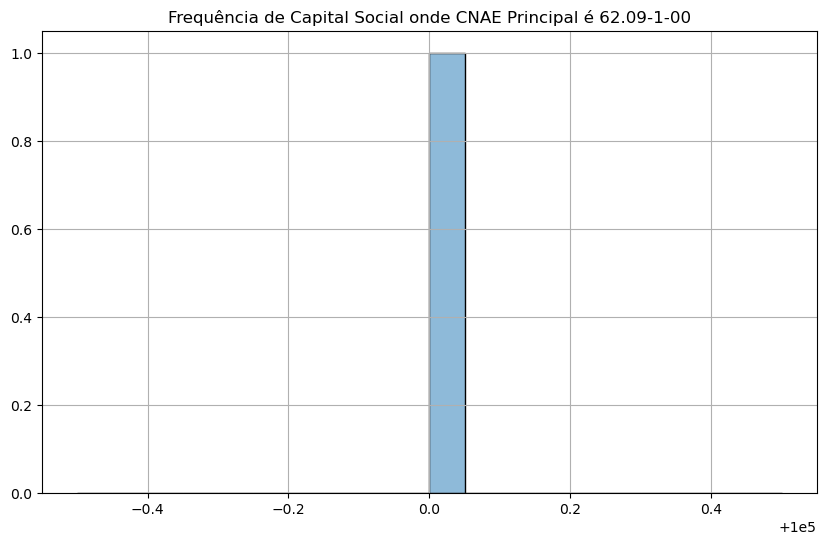

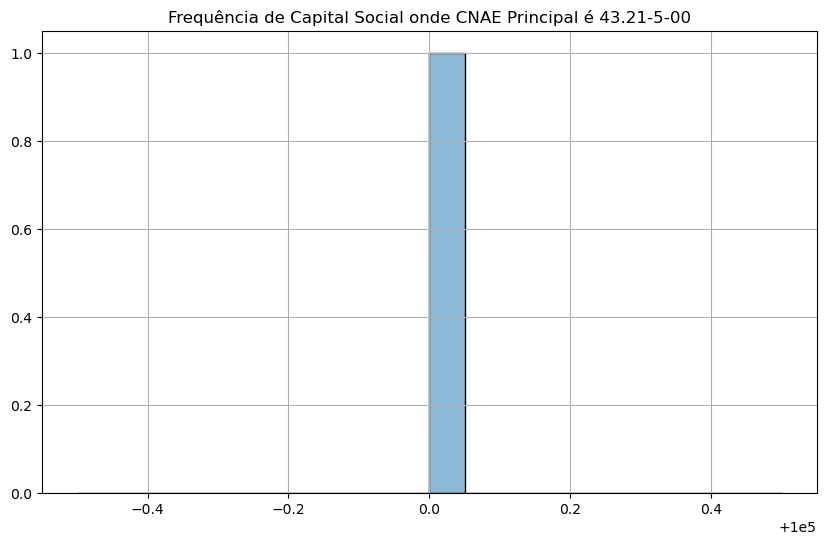

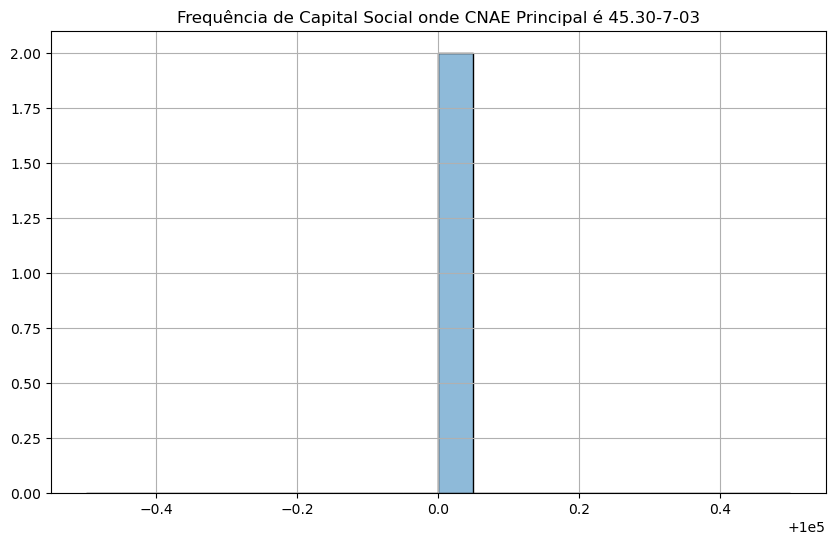

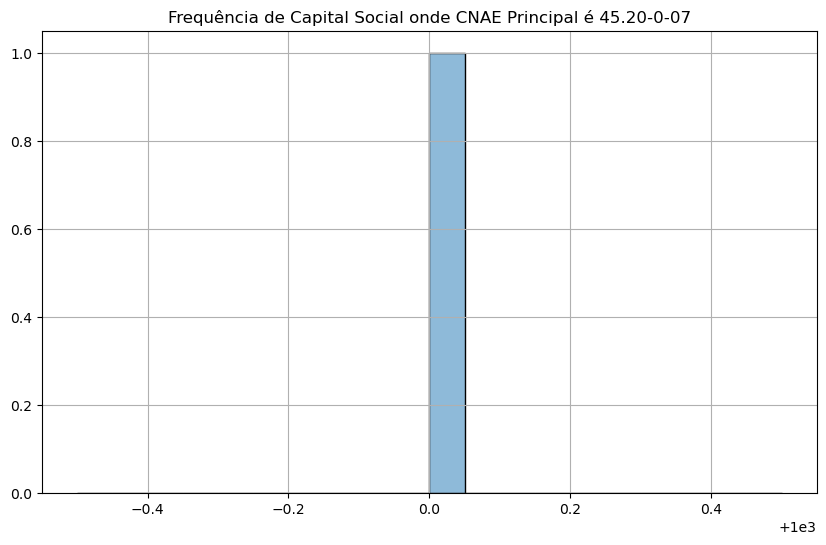

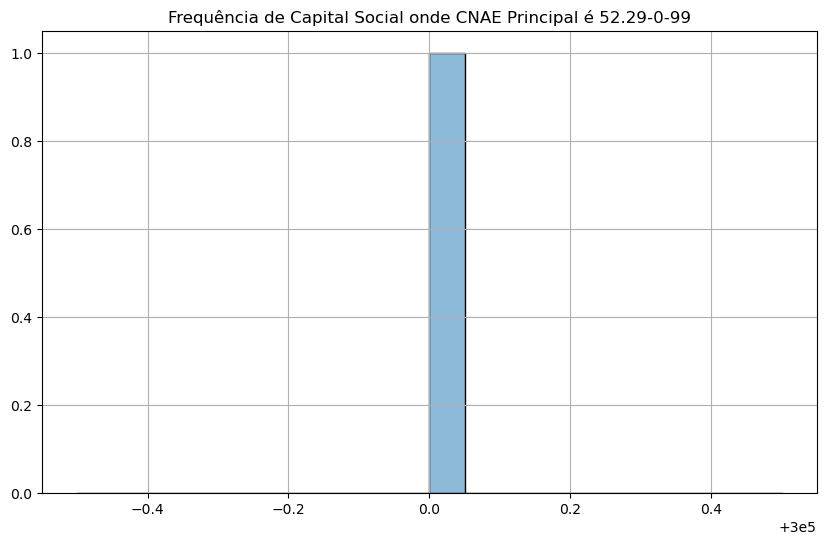

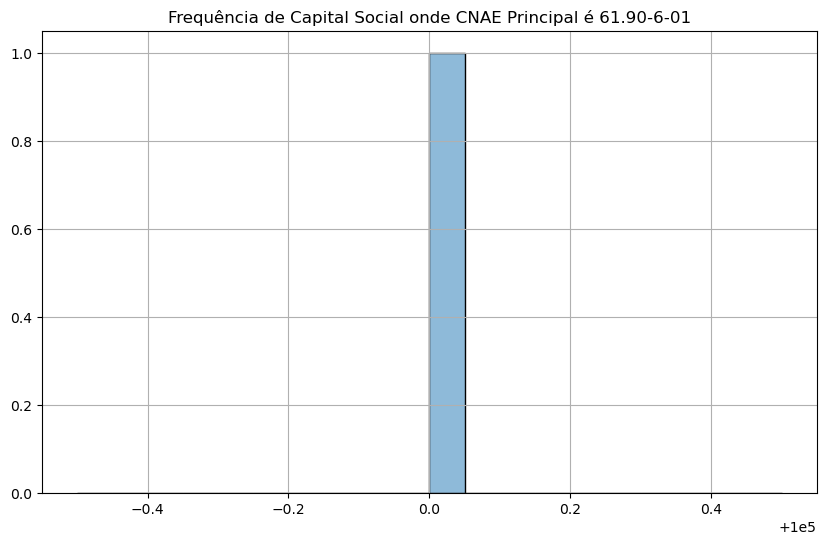

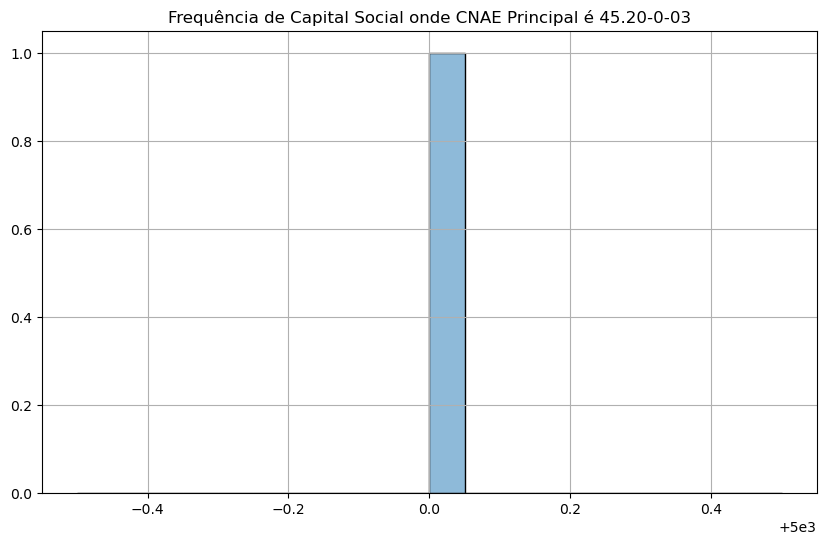

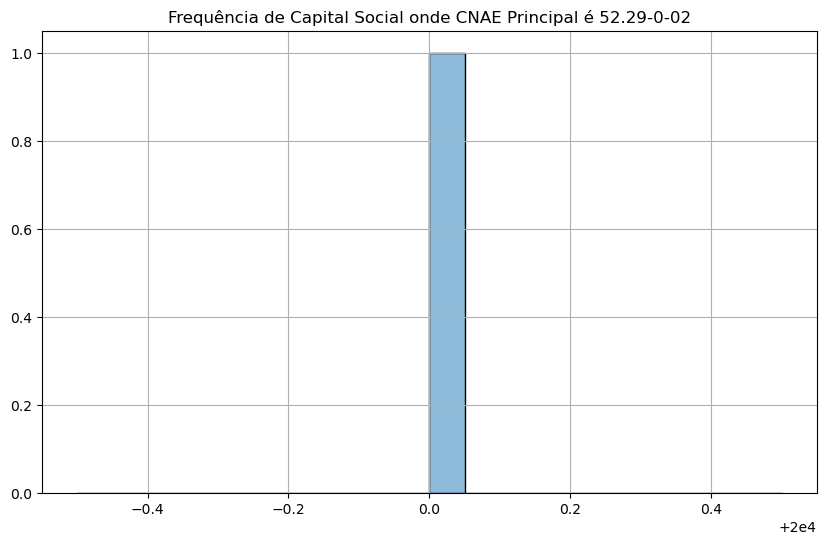

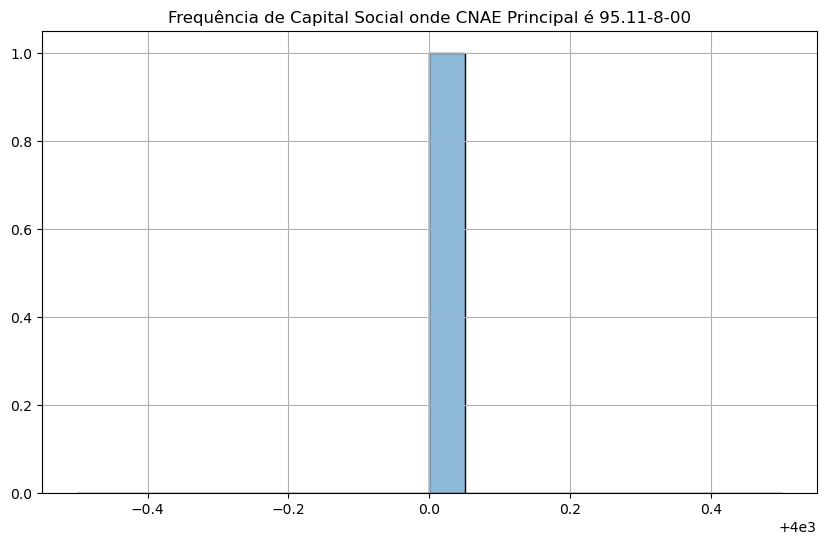

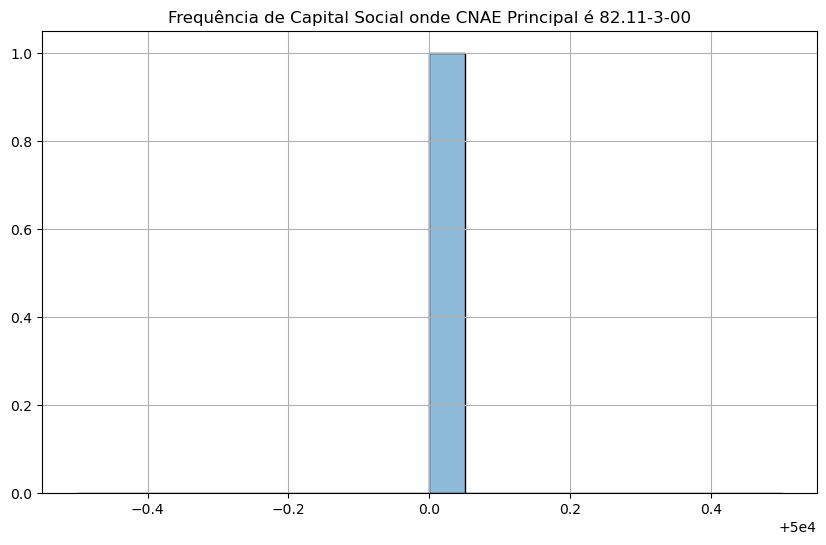

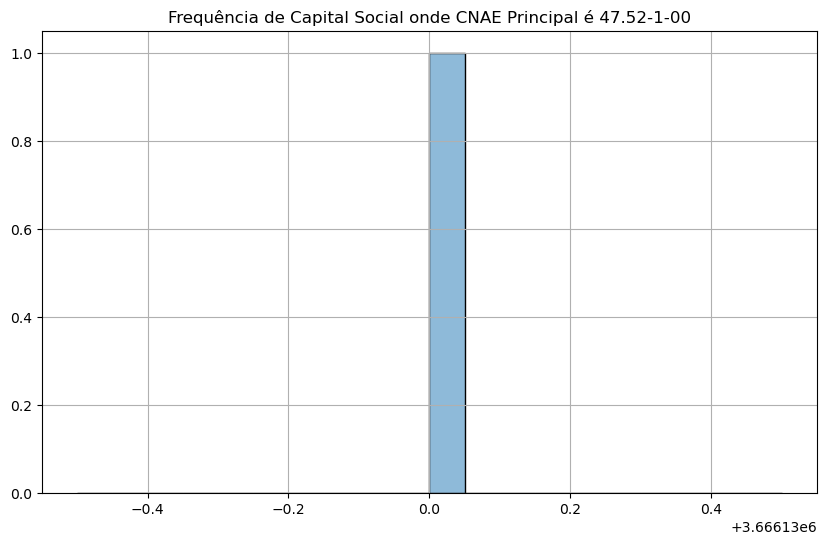

In [76]:
# Na coluna numérica
# Para cada coluna categórica
## Separa as categorias daquela coluna
## Para cada categoria da coluna categórica
### Filtra o df pela categoria na coluna categórica
### Criar um histograma da coluna numérica

for col in c_vars:
    for cat in df[col].unique():
        histograma(df_t[df_t[col] == cat], 'Capital Social',f'Frequência de Capital Social onde {col} é {cat}')

Esta série de histogramas demonstra que não há qualquer tendência a aparecer capital social zero de acordo com qualquer característica qualitativa das empresas.